# Imports :

In [1]:
import os
import glob
from CSIKit.reader import get_reader
from CSIKit.reader import get_reader
from CSIKit.util import csitools
from CSIKit.tools.batch_graph import BatchGraph
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
from os import listdir
from os.path import isfile, join
from collections import Counter


# All files names : 

In [2]:
#Command dataset
#mypath = r"pcap_files/"
#Internet dataset
mypath = r"csv_files/csv_data_amplitude/"
file_names = [f.split(".")[0] for f in listdir(mypath) if isfile(join(mypath, f))]
pattern = r'[0-9]'
activities = list(set([re.sub(pattern, '', name) for name in file_names]))
print(activities)

['walk', 'washingdishes', 'sitdown', 'standup', 'getintobed', 'drink', 'cook', 'nothing', 'petcat', 'sleeping', 'brushteeth']


# Heatmaps :

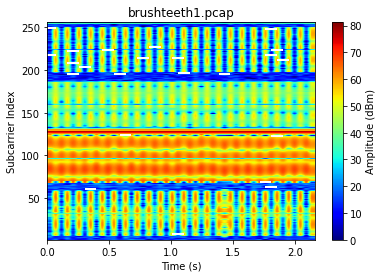

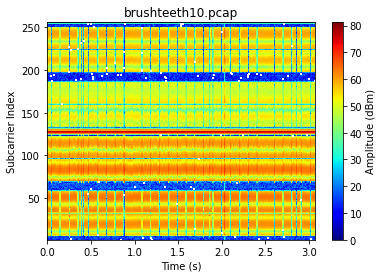

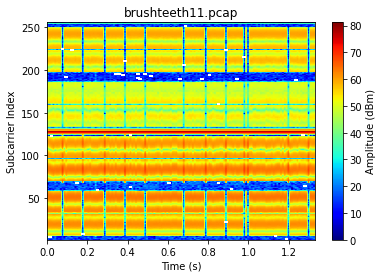

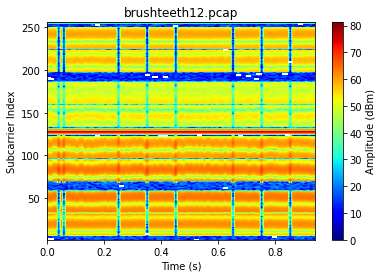

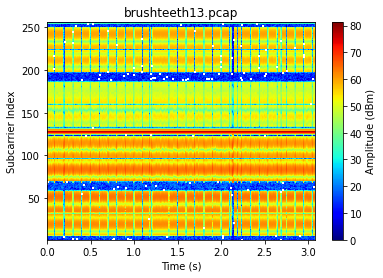

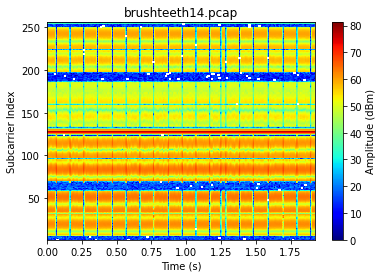

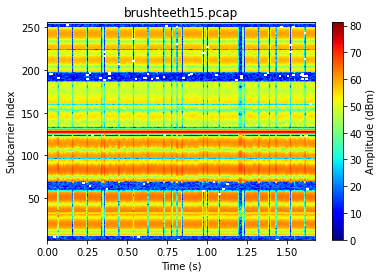

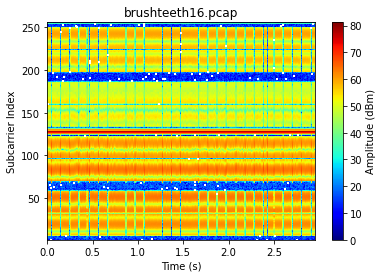

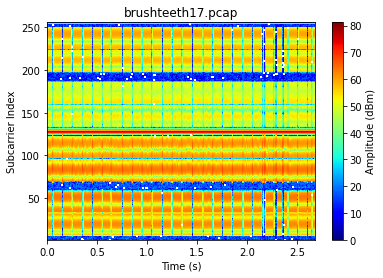

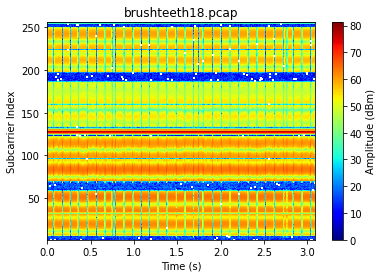

In [3]:
for name in file_names[:10]: 
    #Internet dataset
    b = BatchGraph(fr"data/{name}.pcap")
    #Command dataset
    #b = BatchGraph(fr"pcap_files/{name}.pcap")
    b.heatmap()

# Plot phase packets from one file :

C:\Users\Saber\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


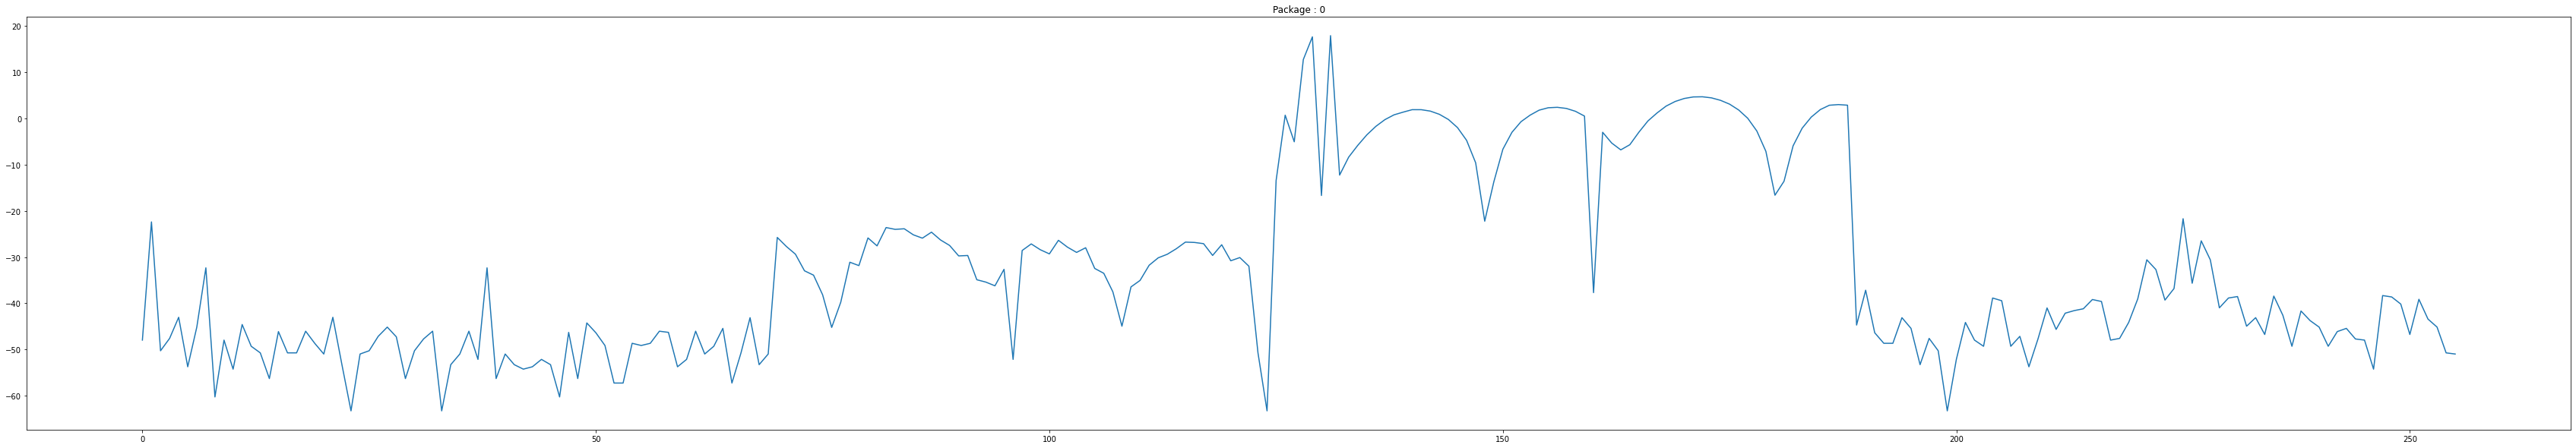

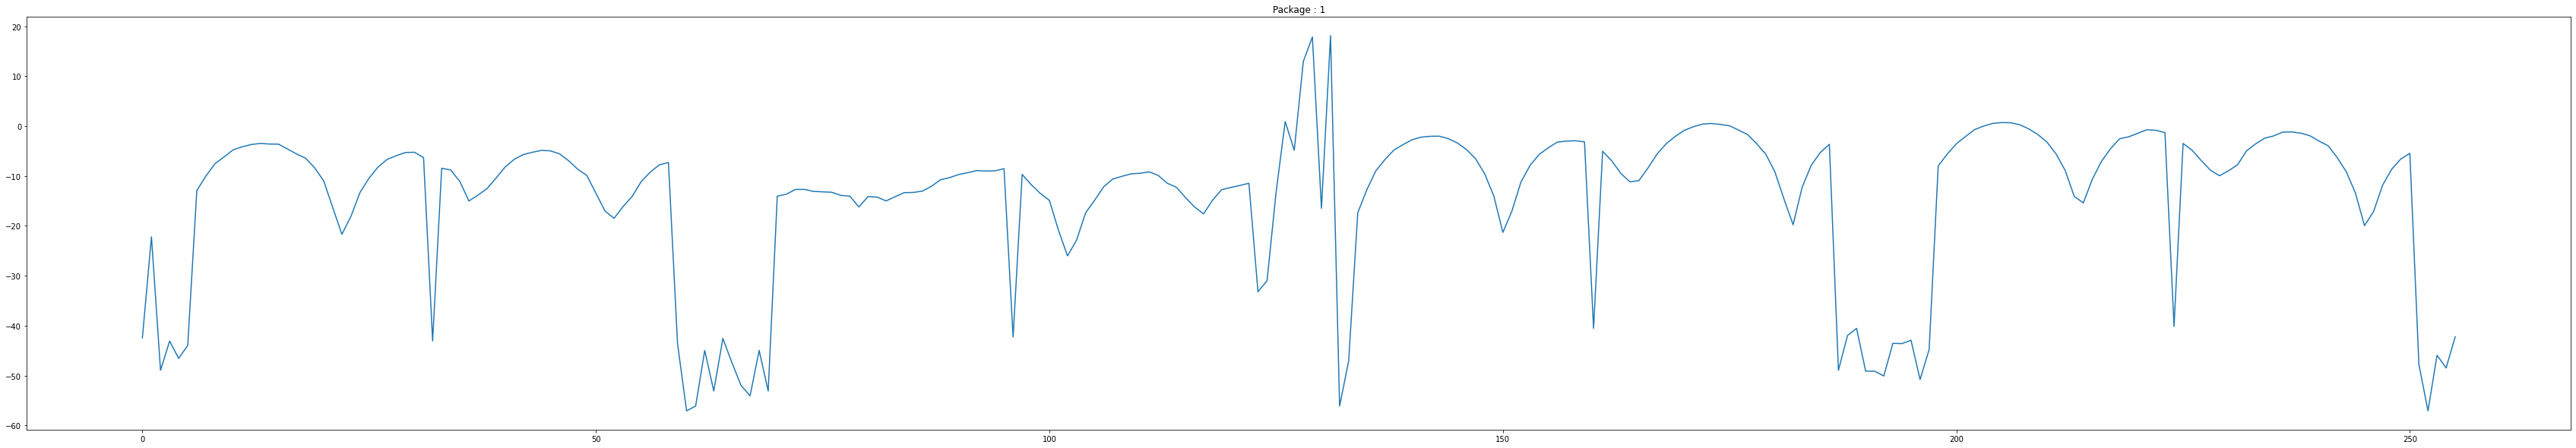

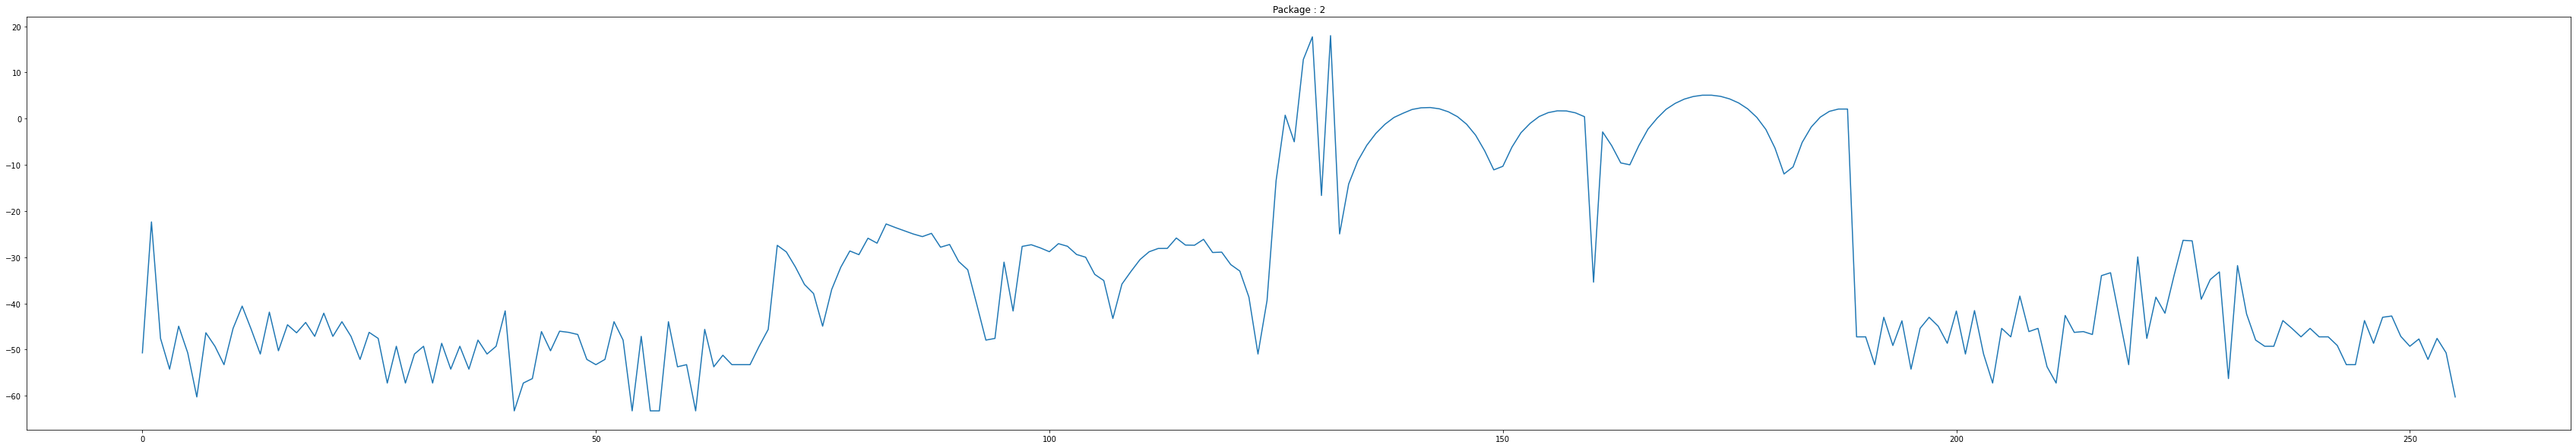

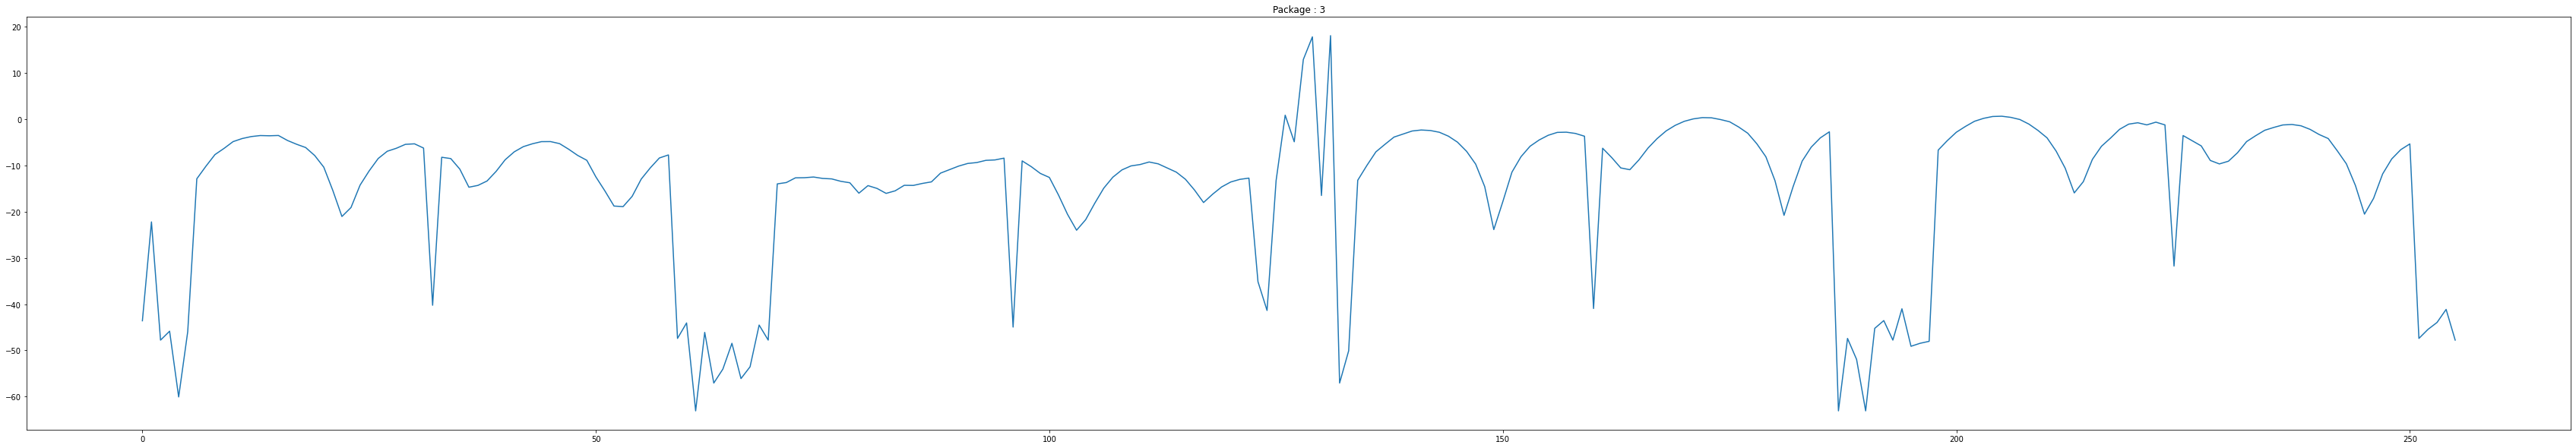

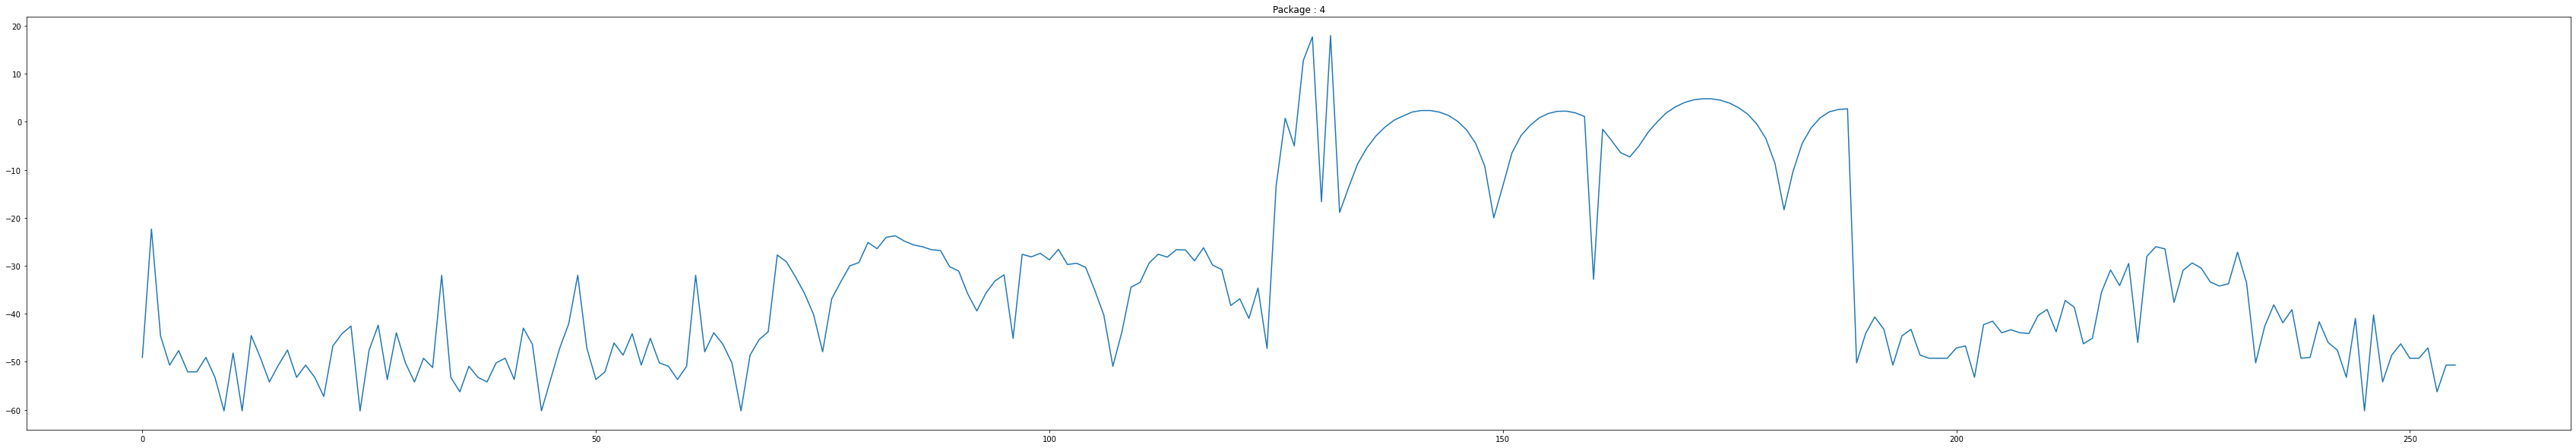

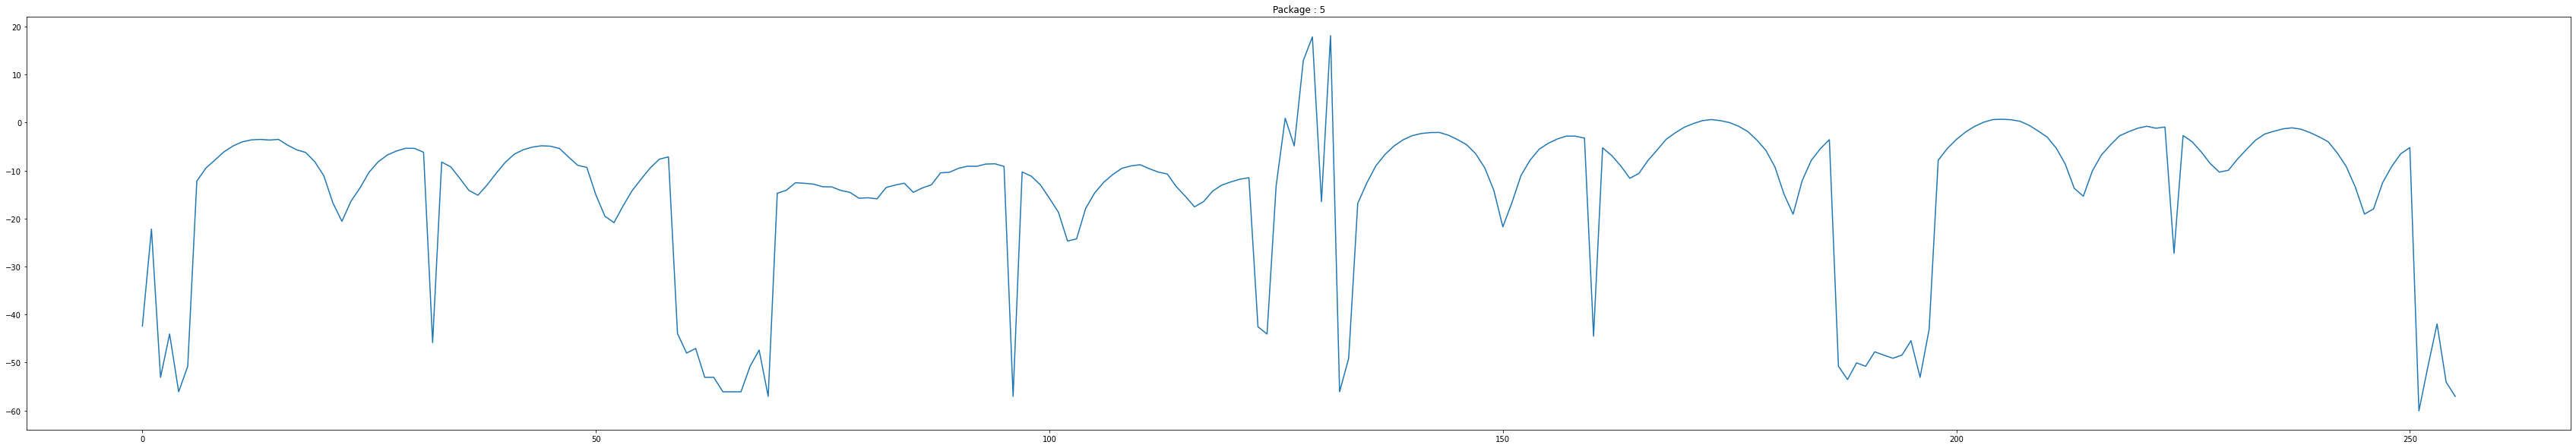

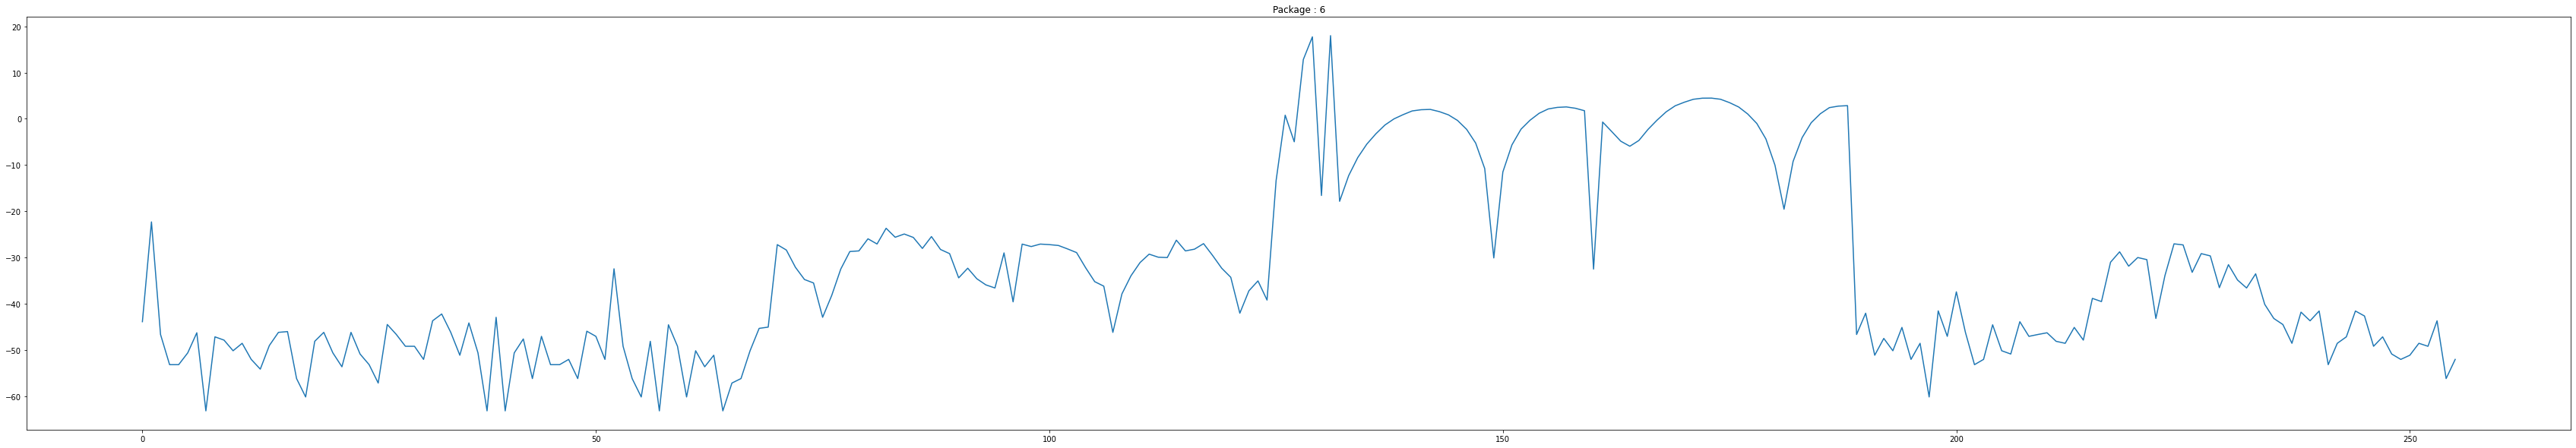

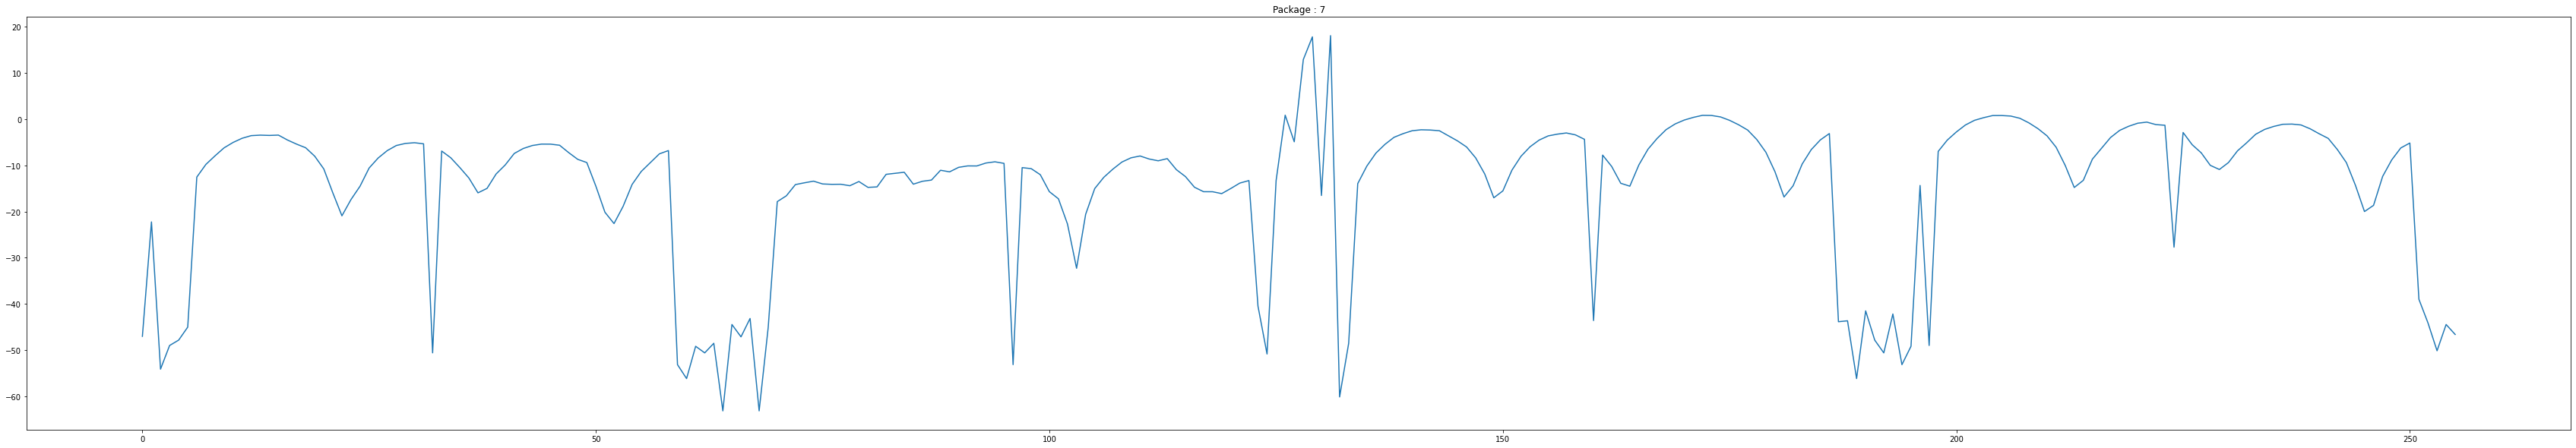

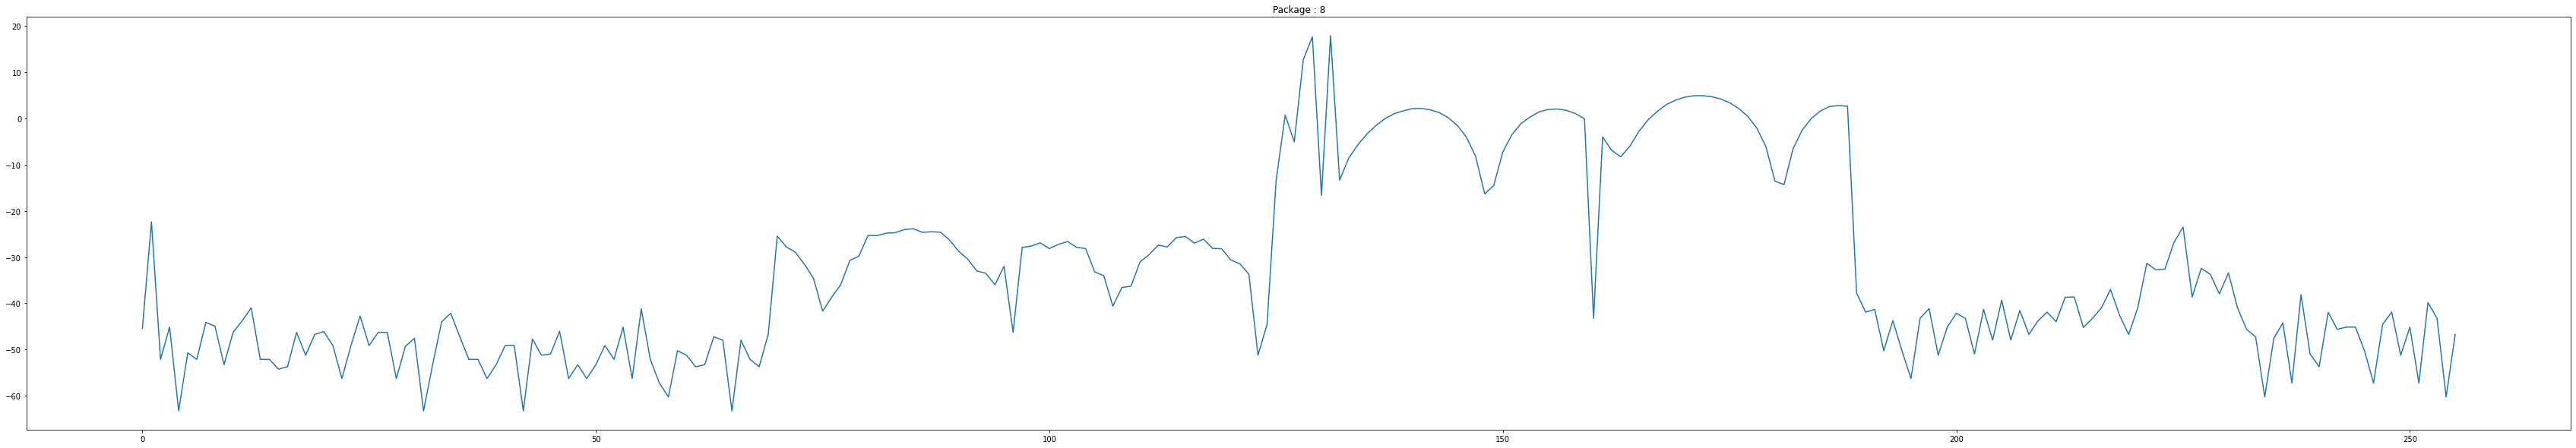

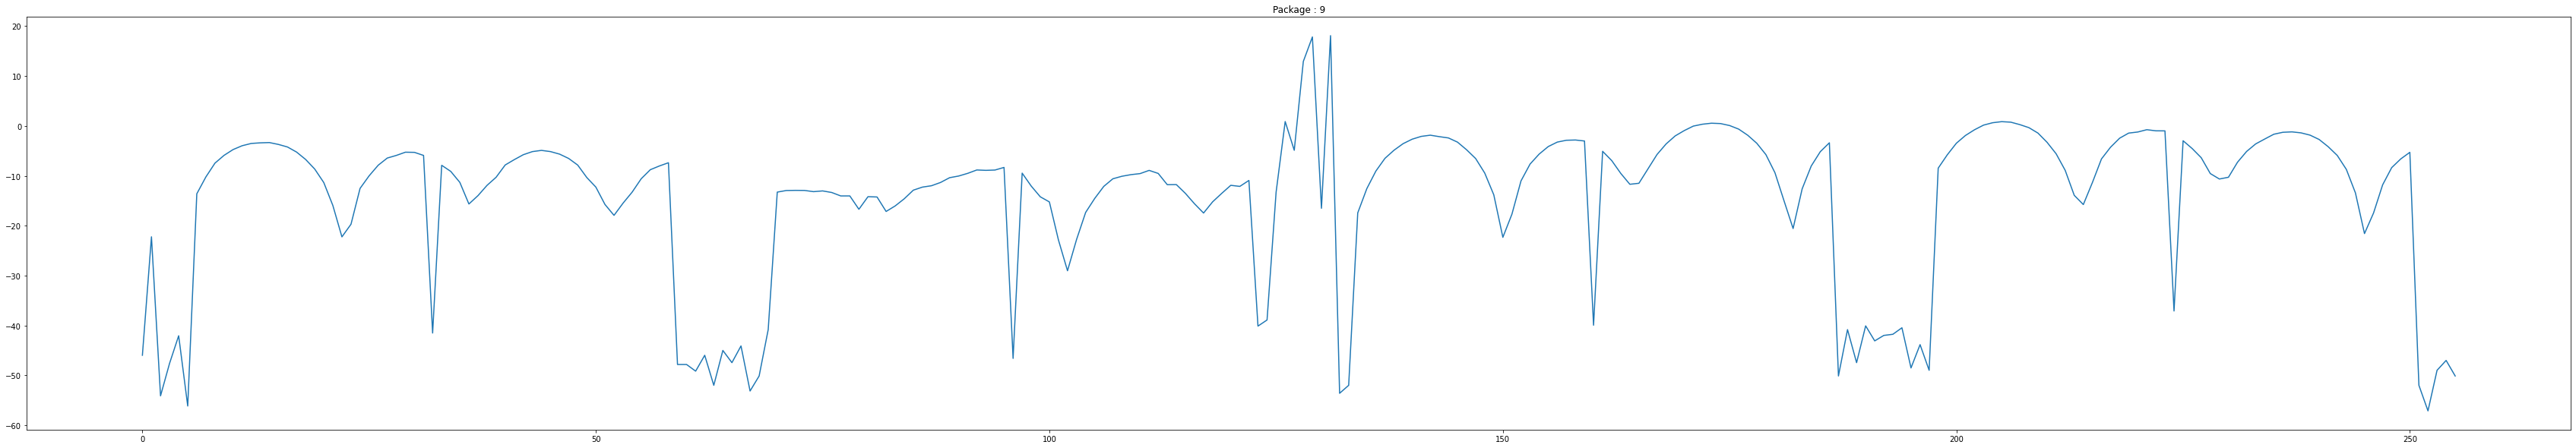

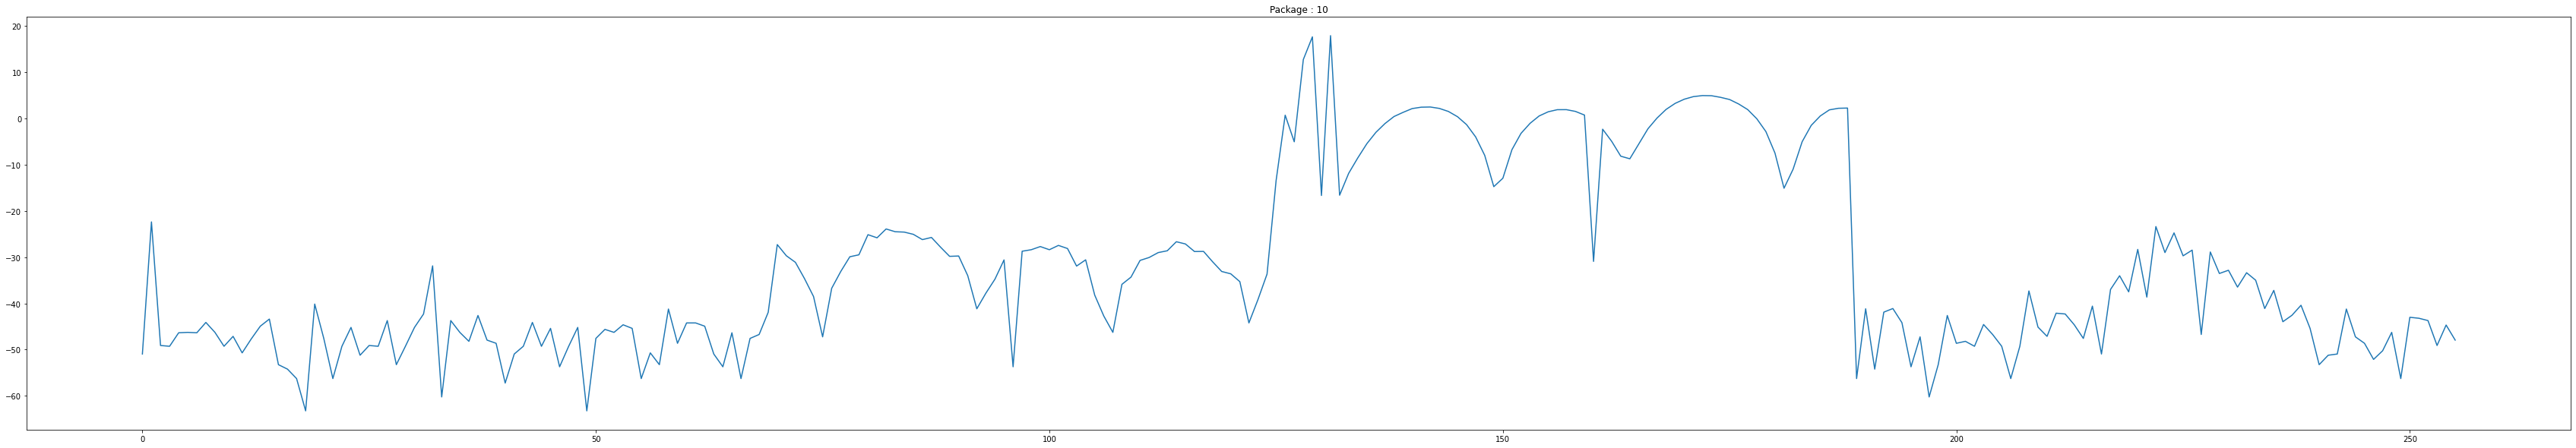

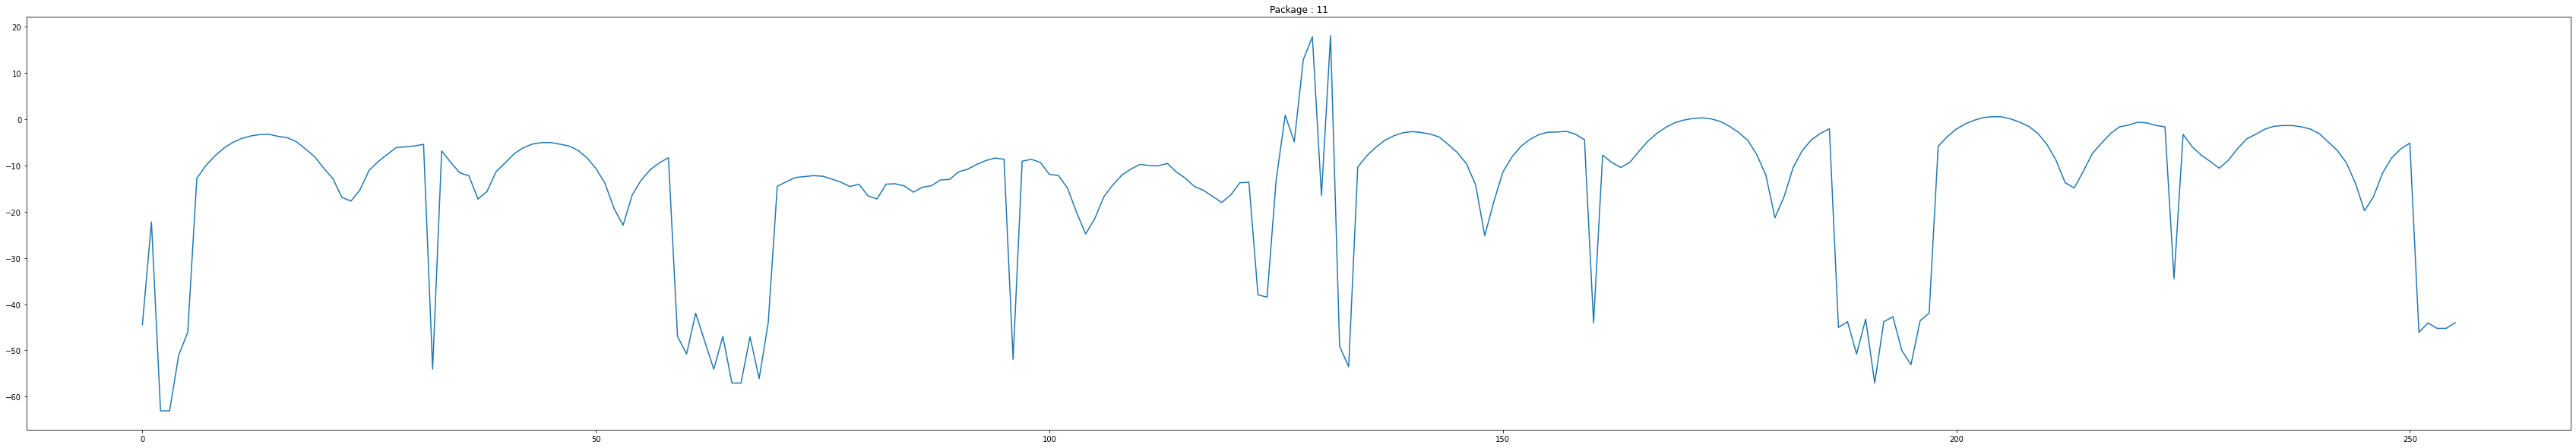

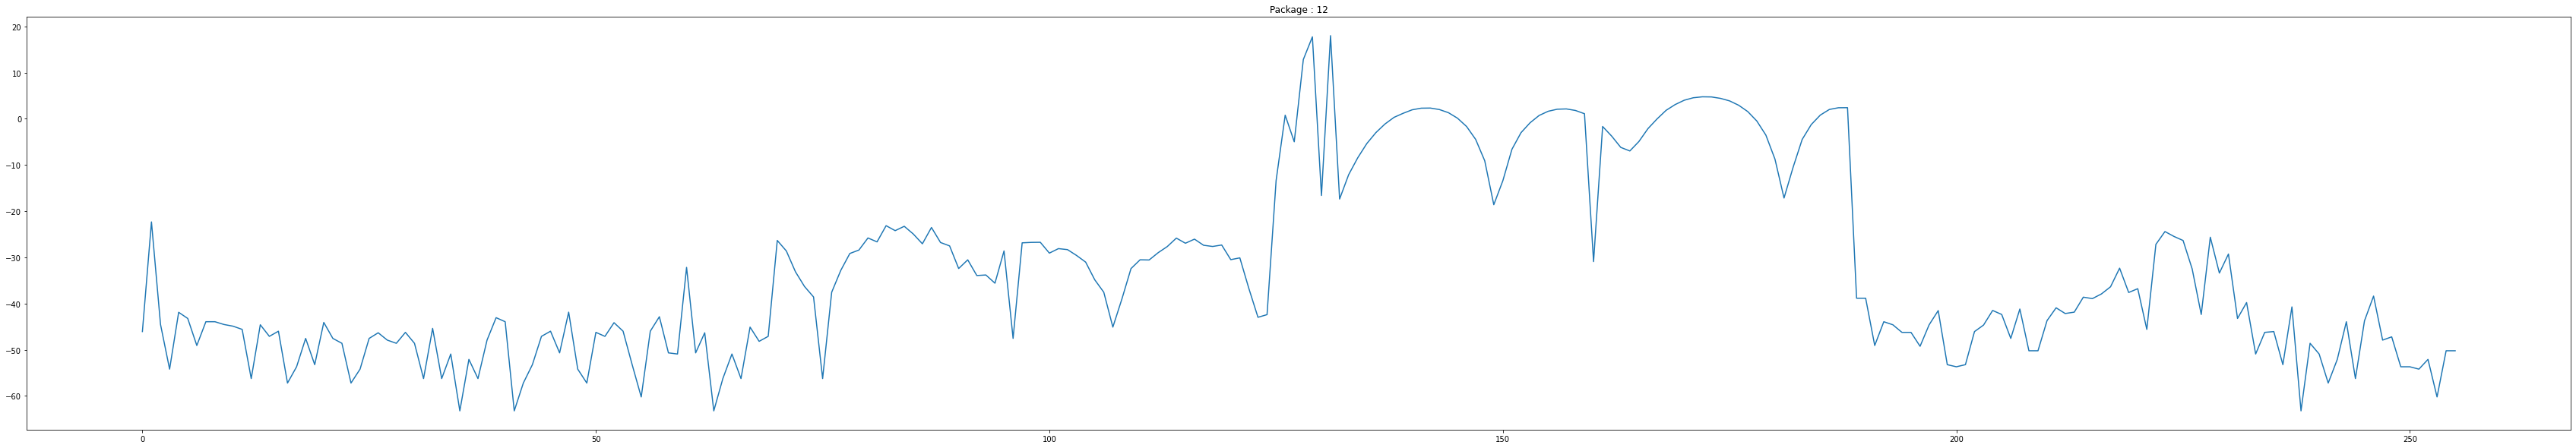

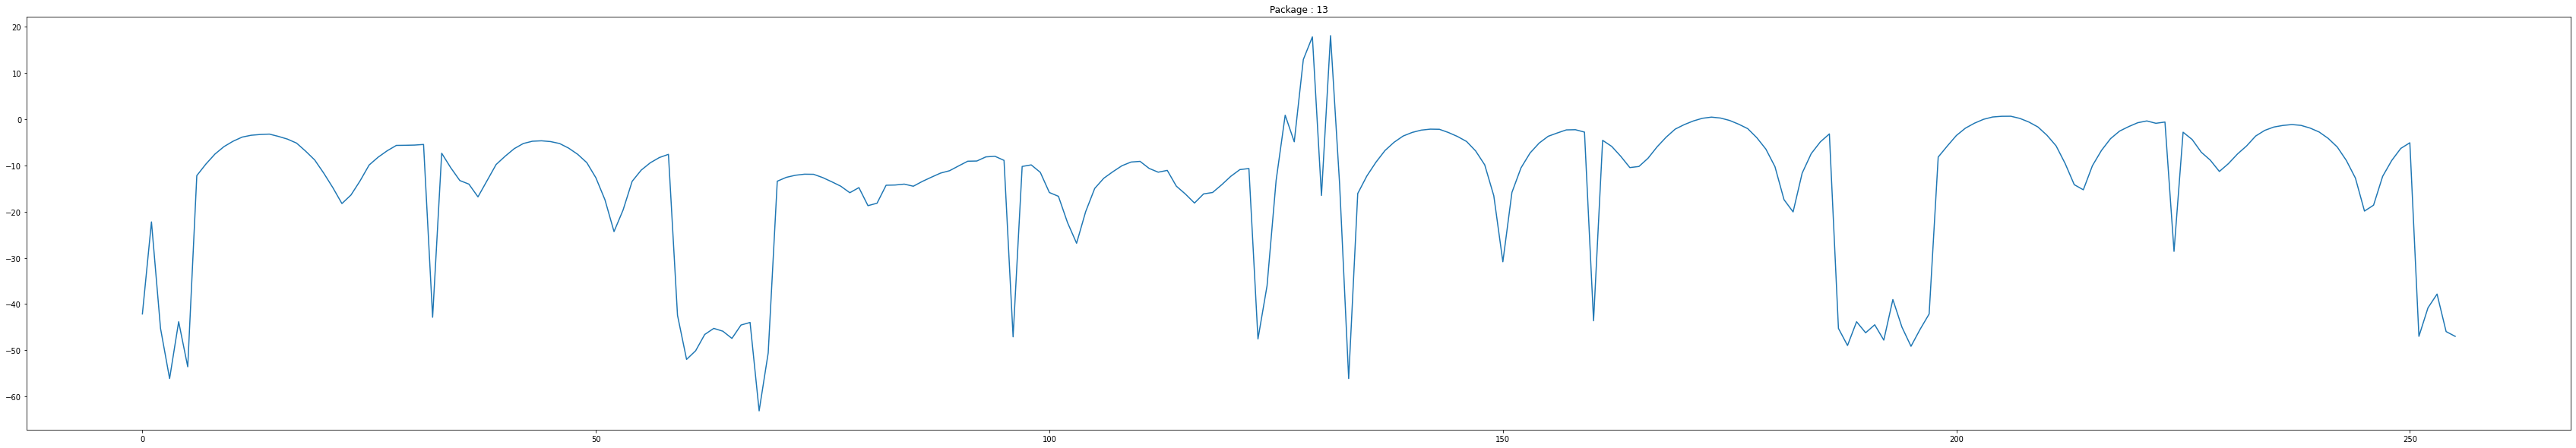

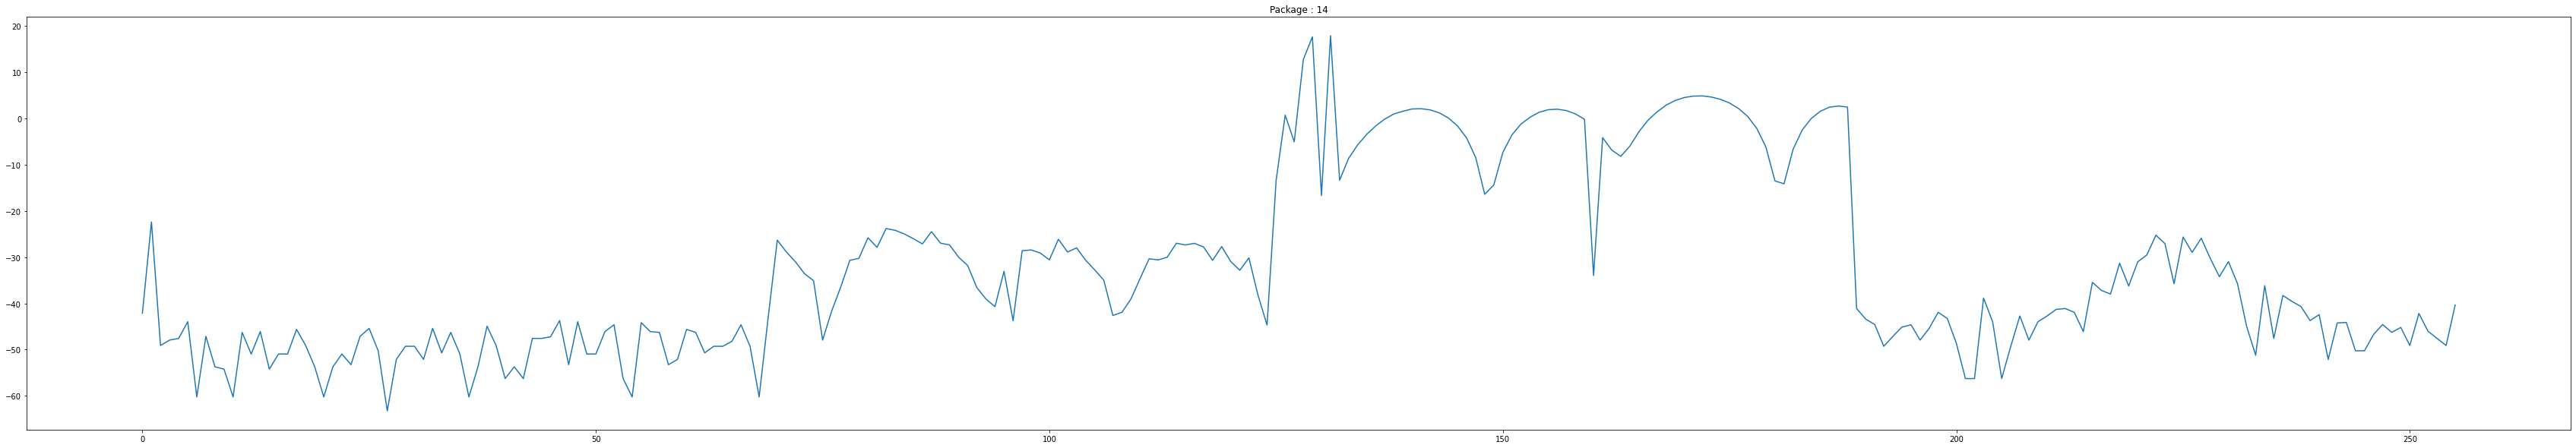

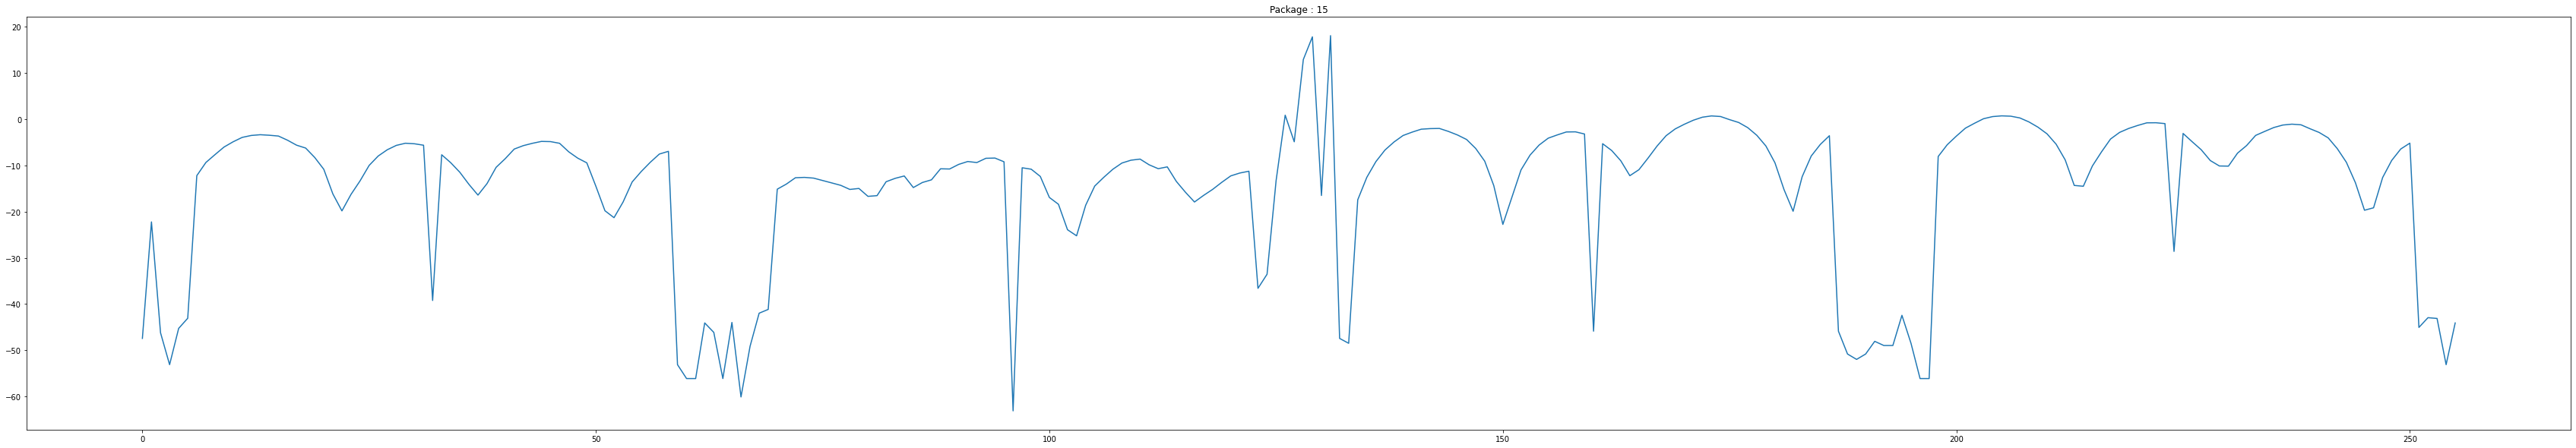

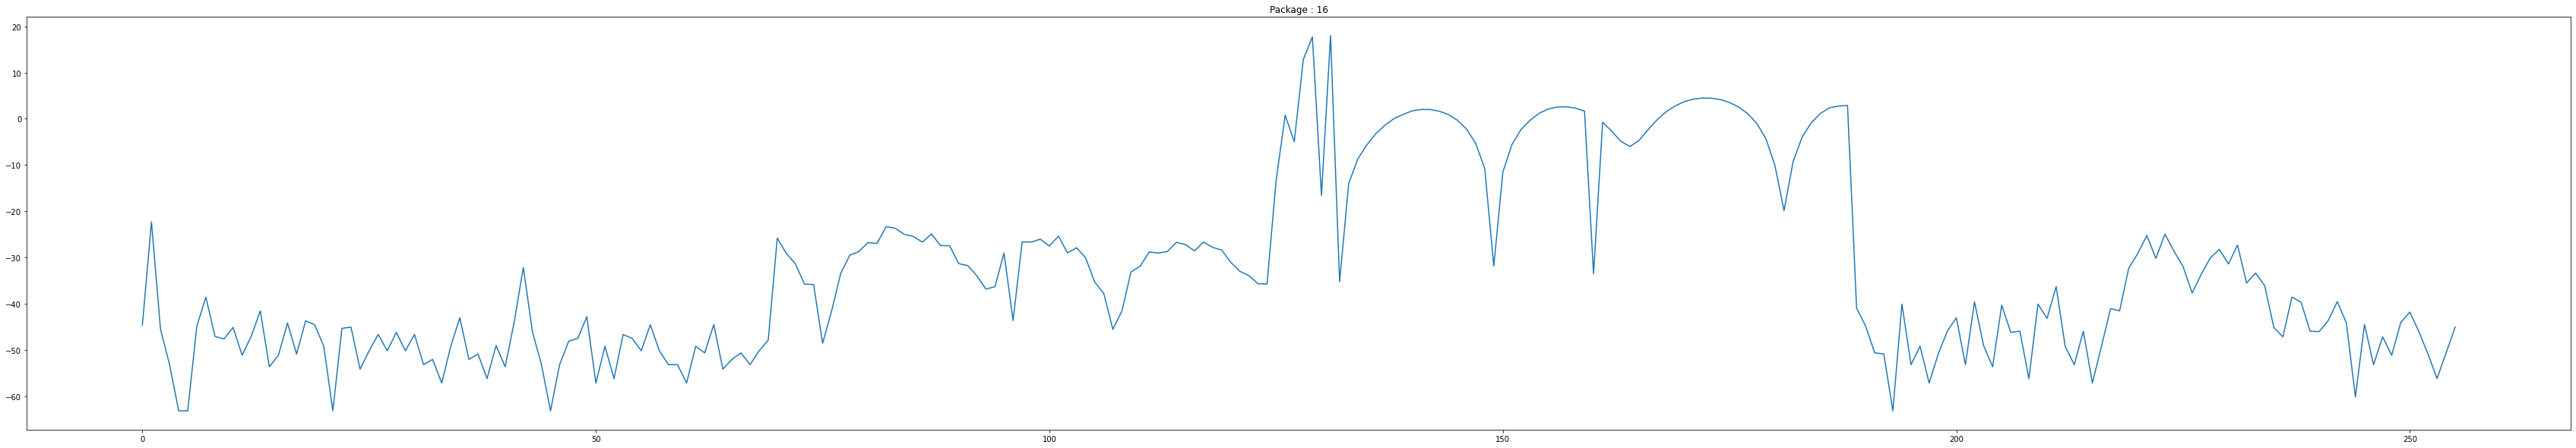

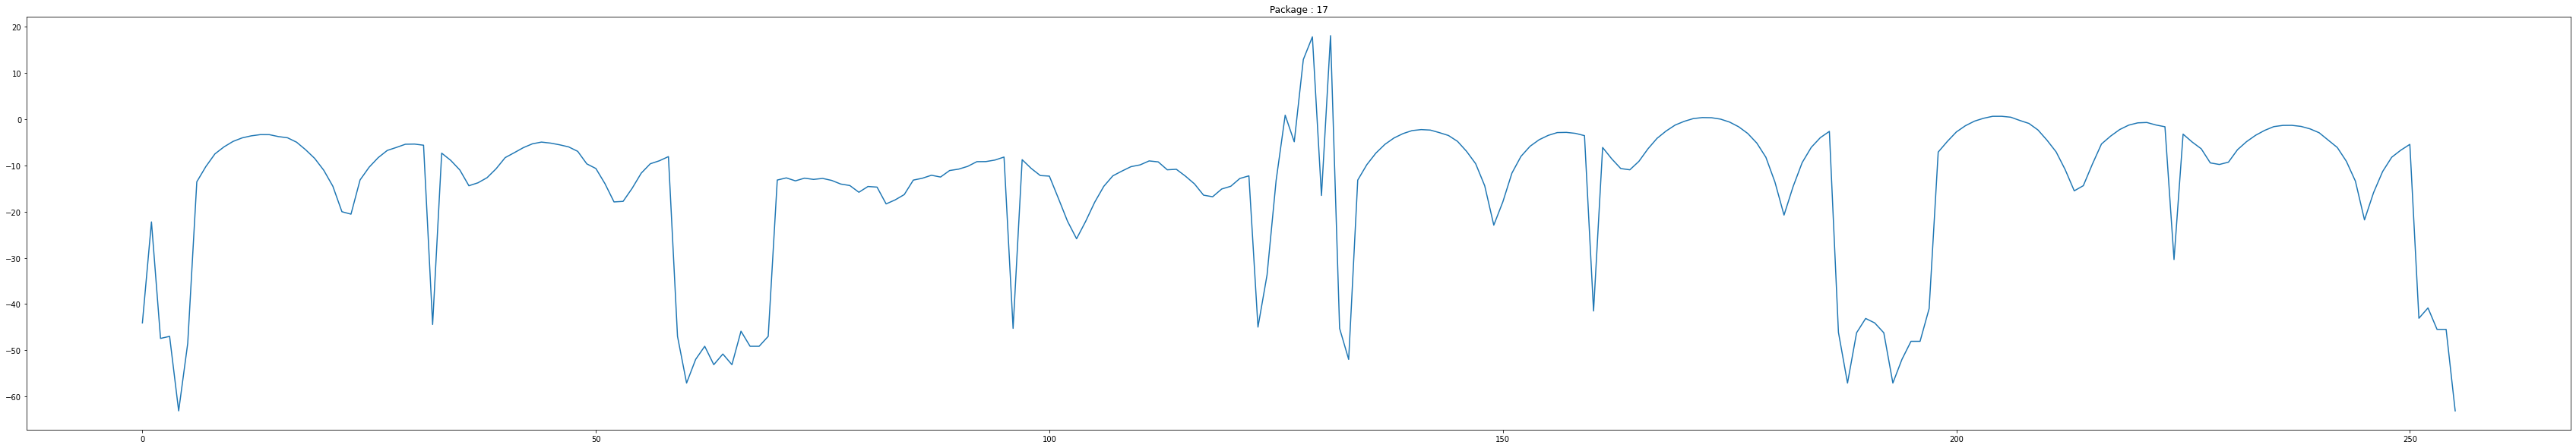

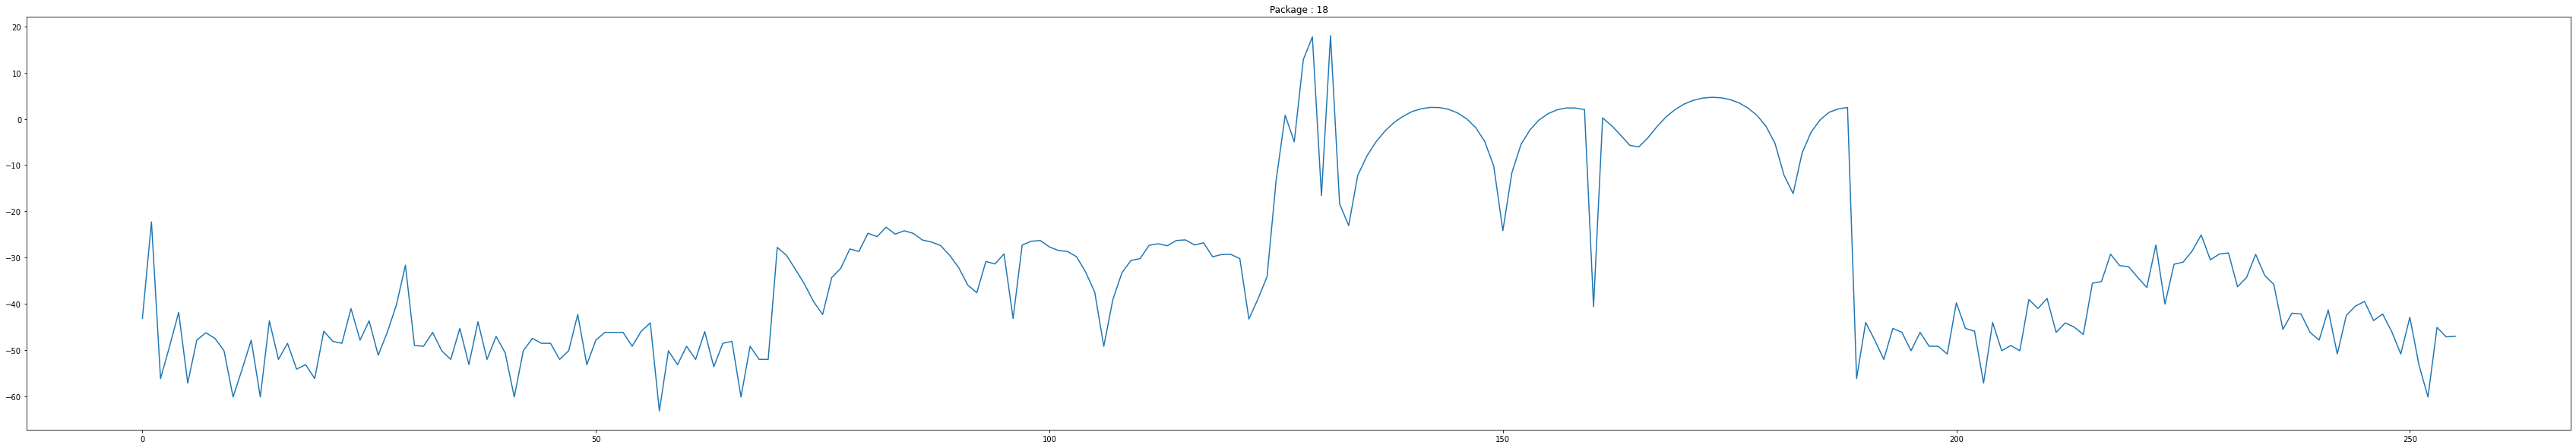

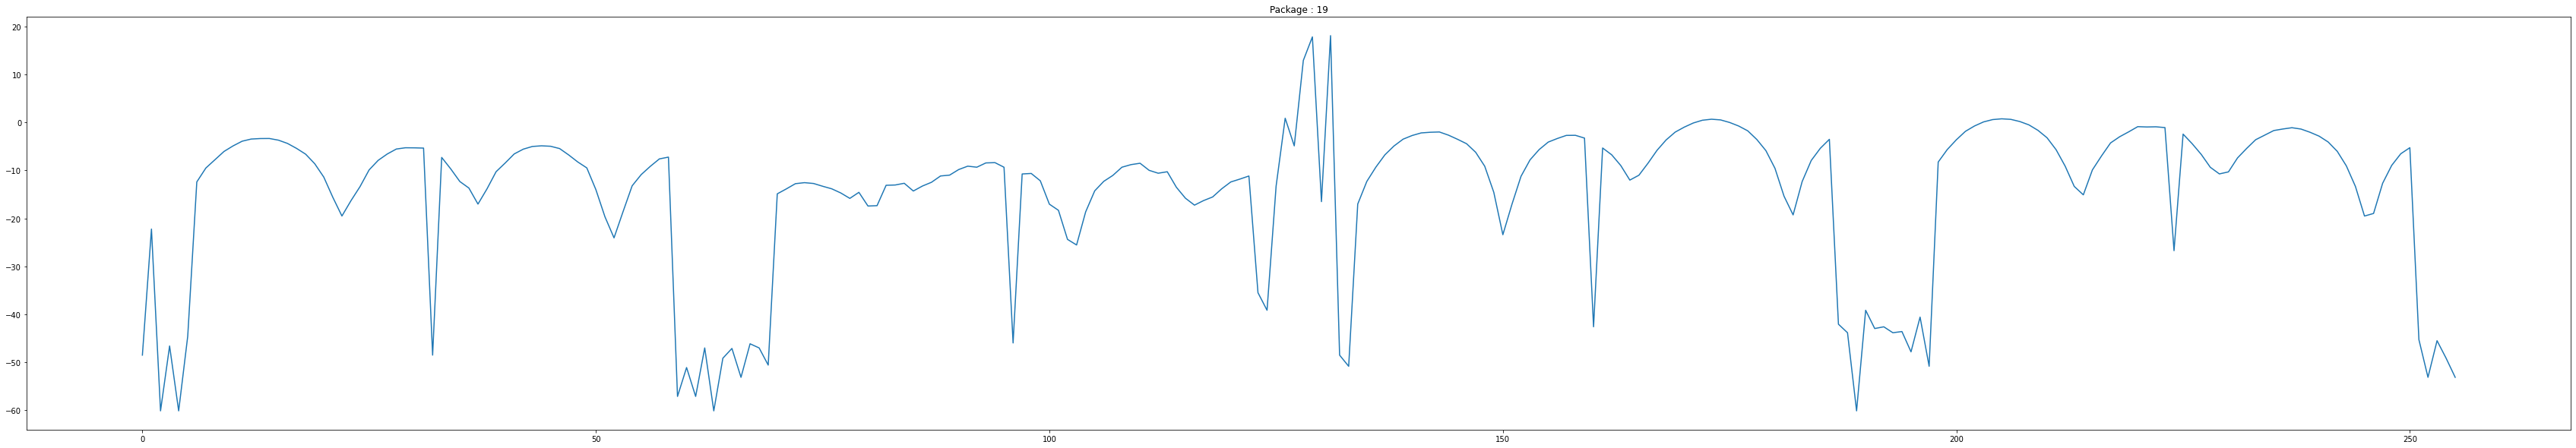

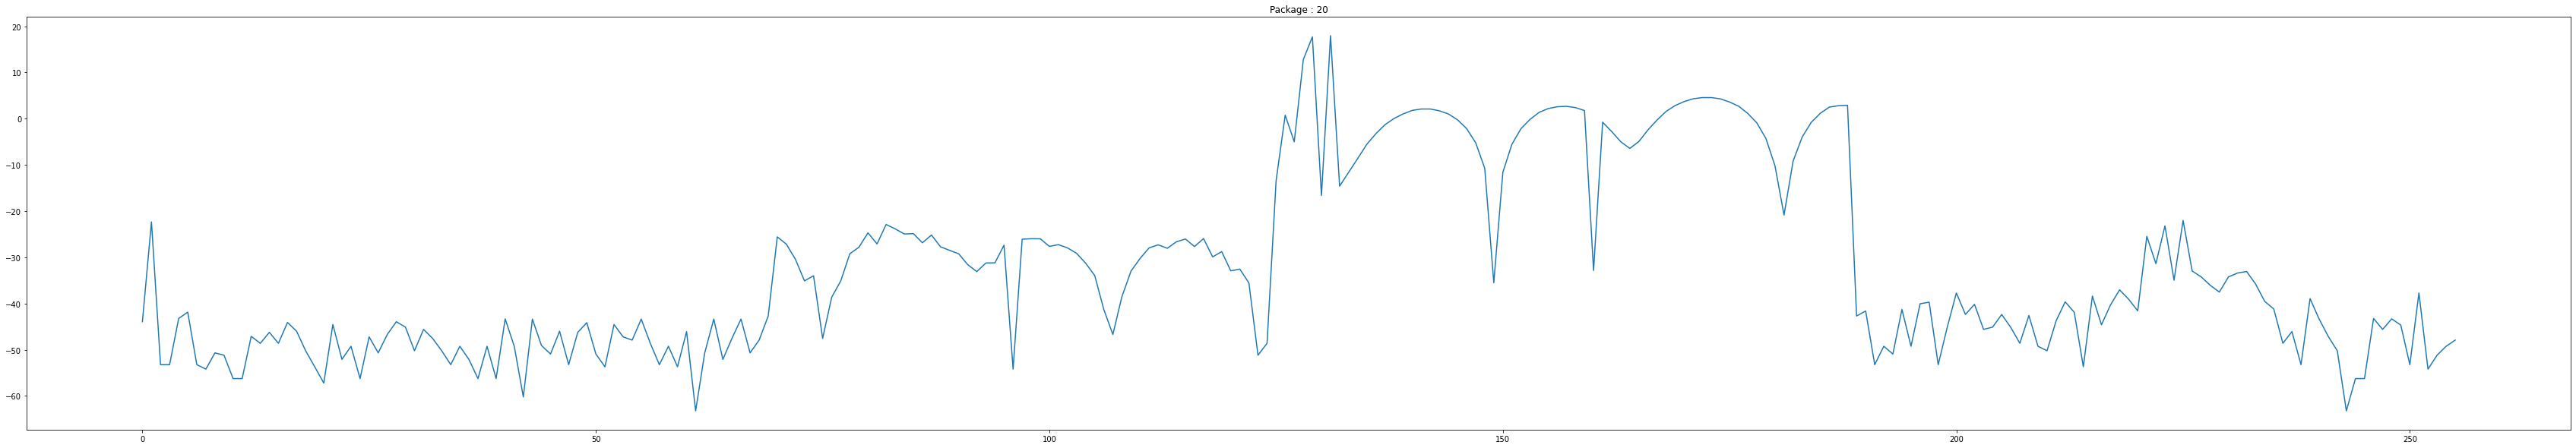

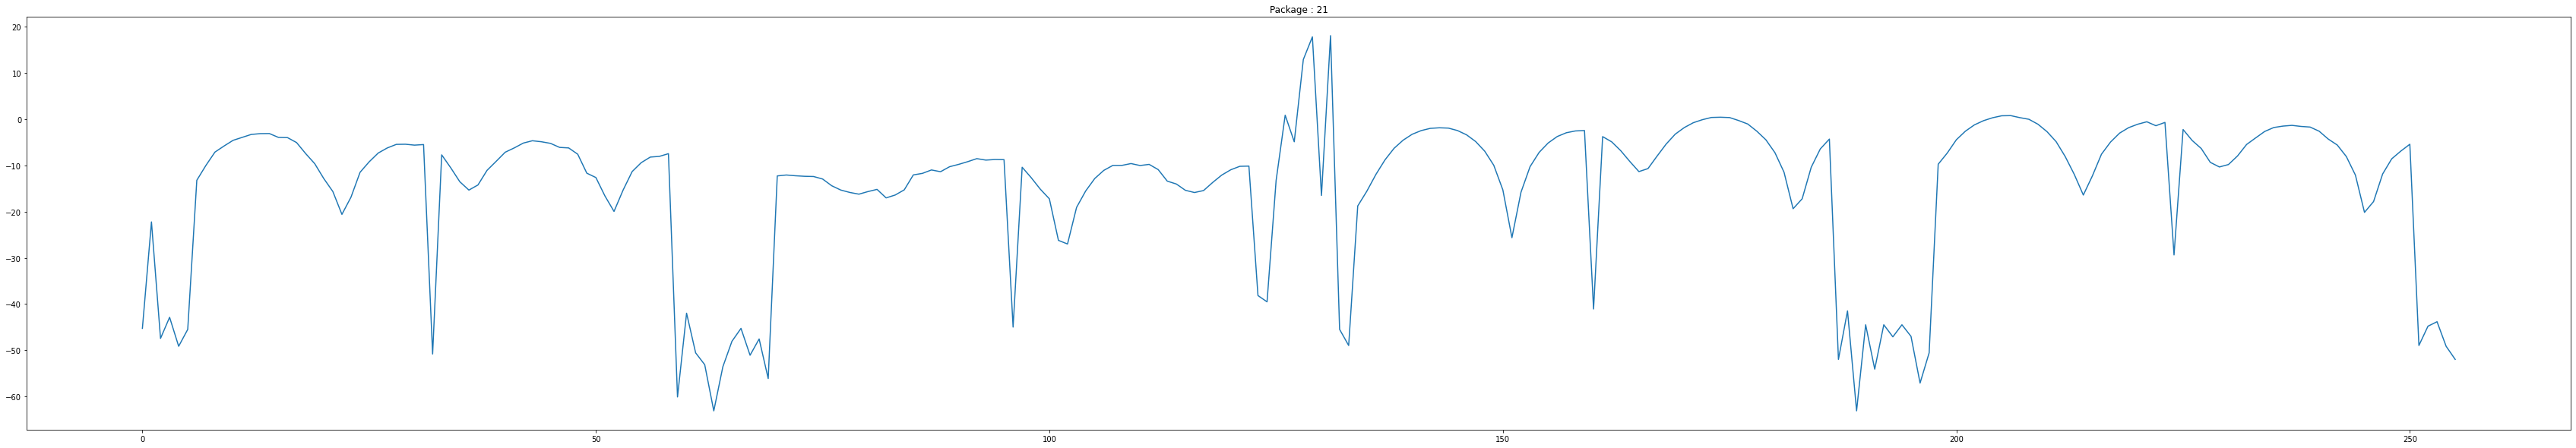

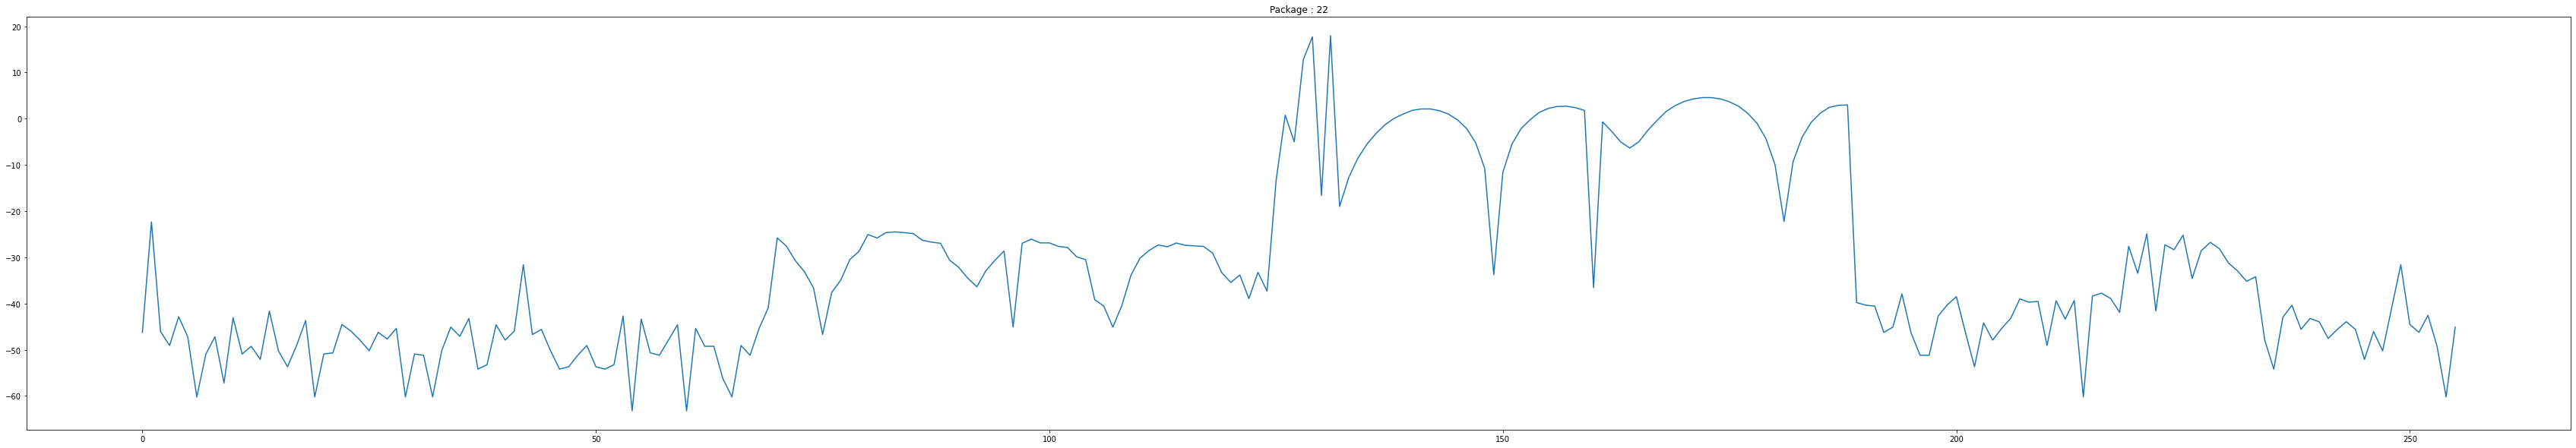

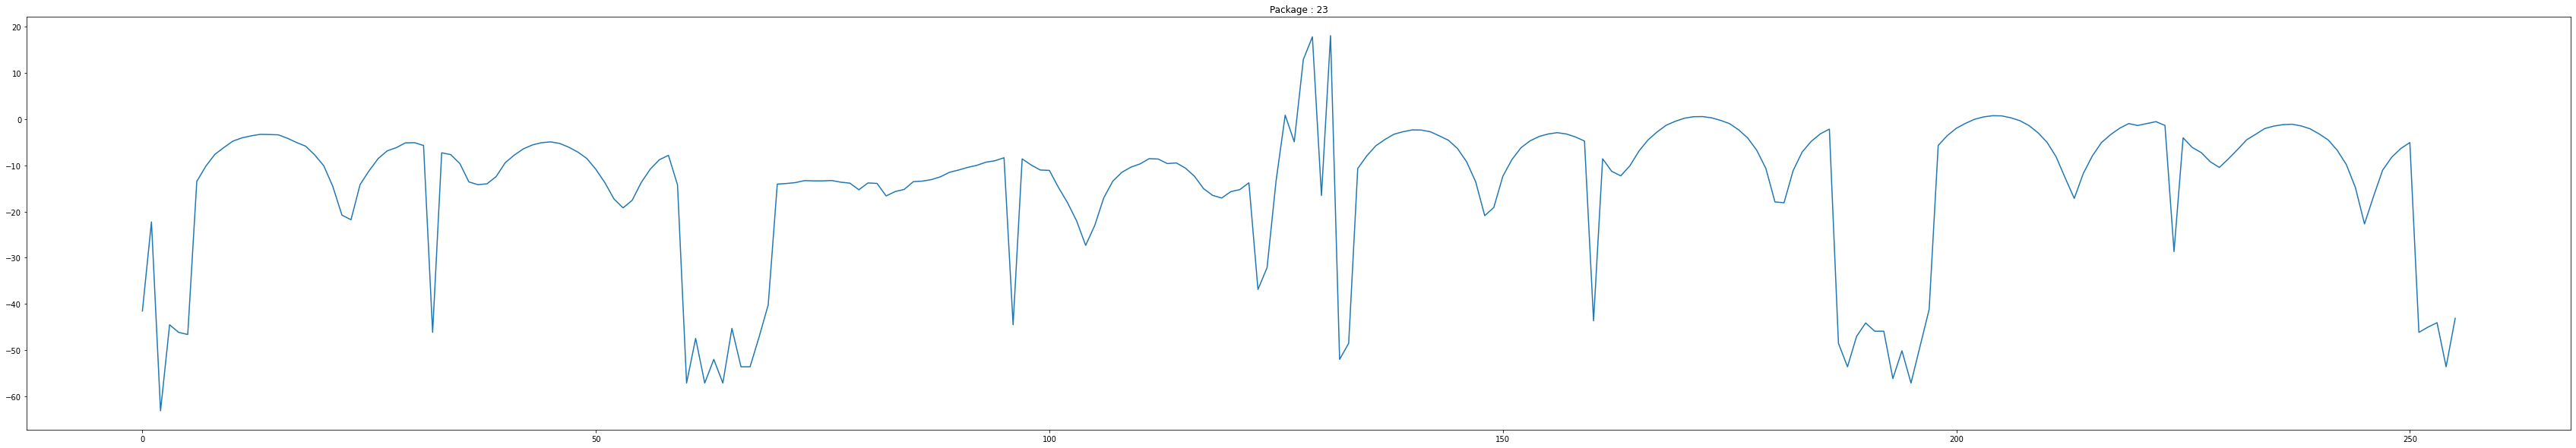

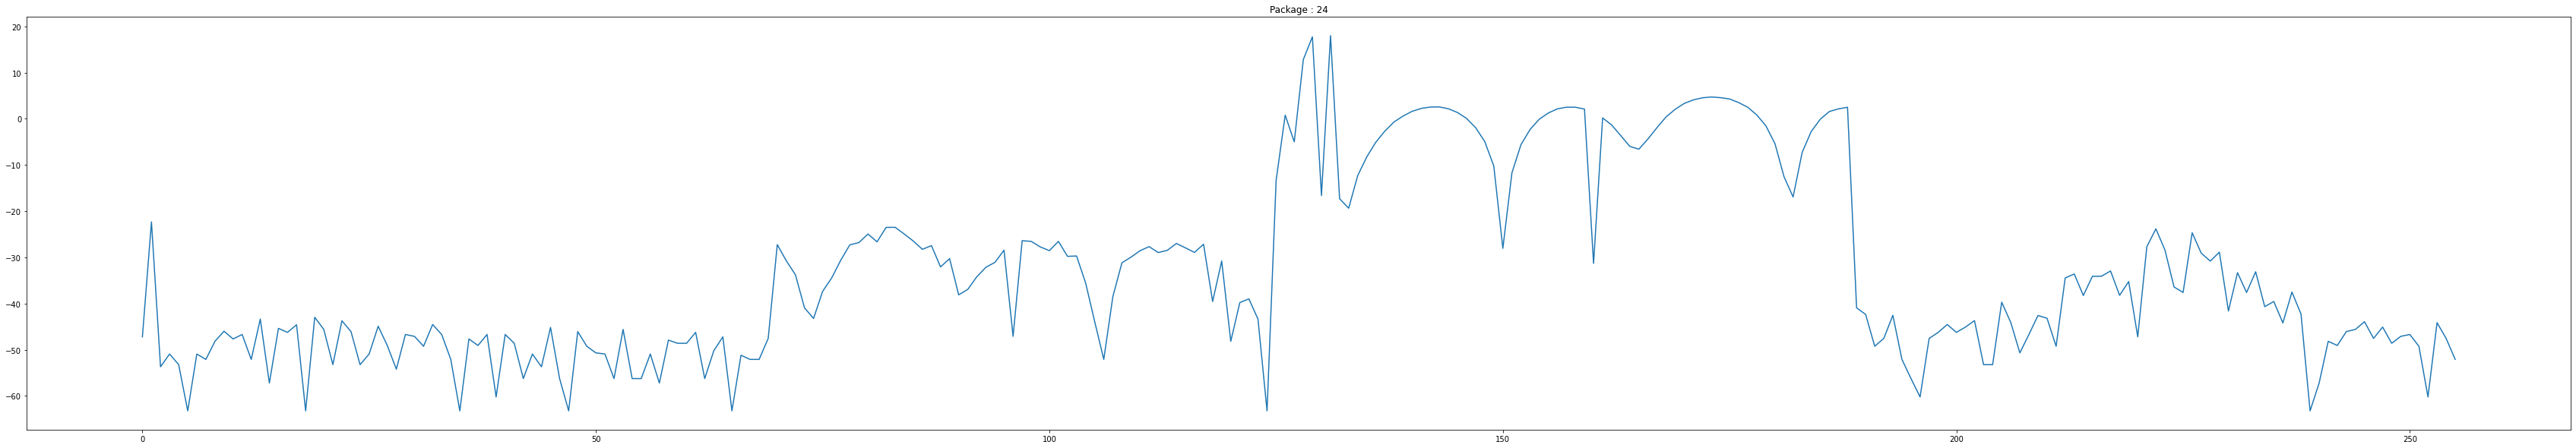

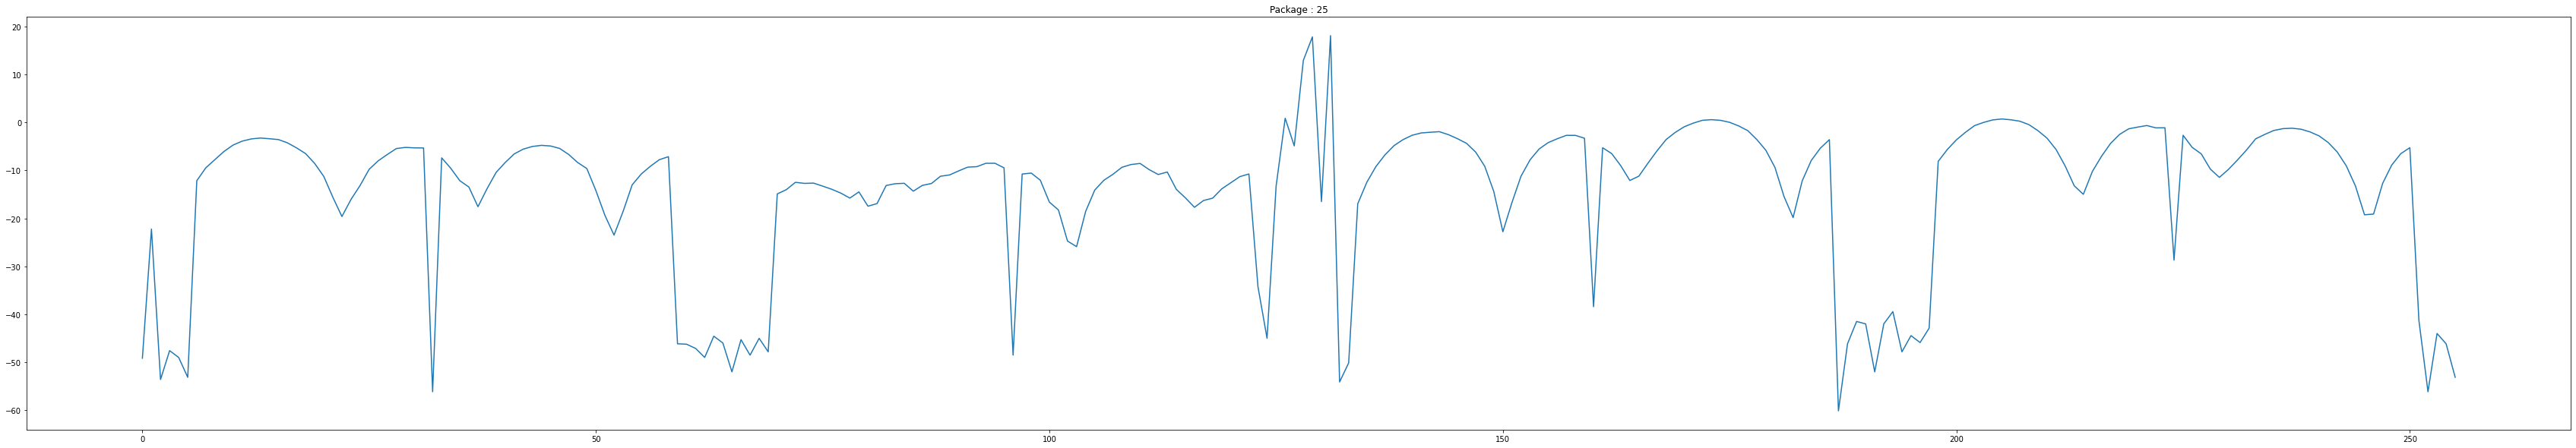

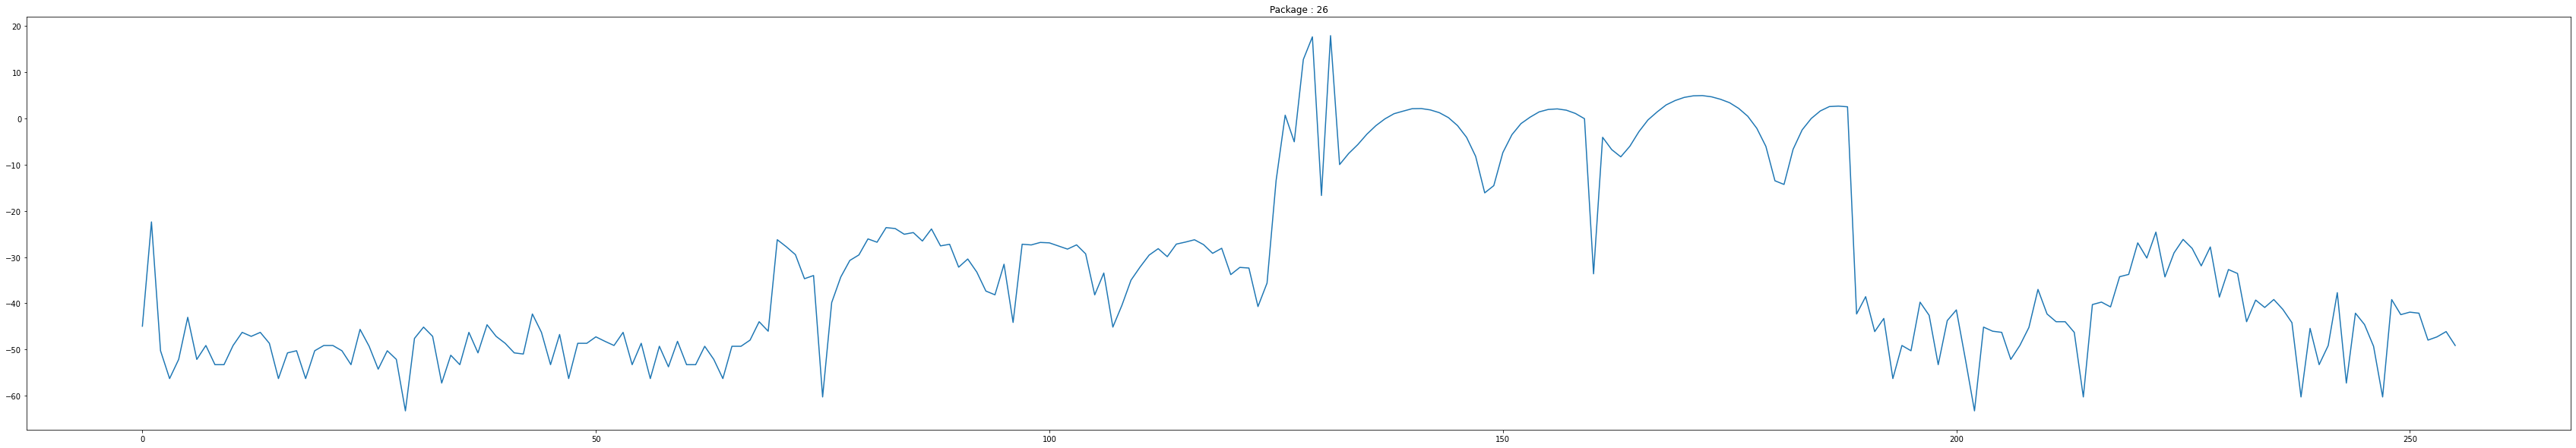

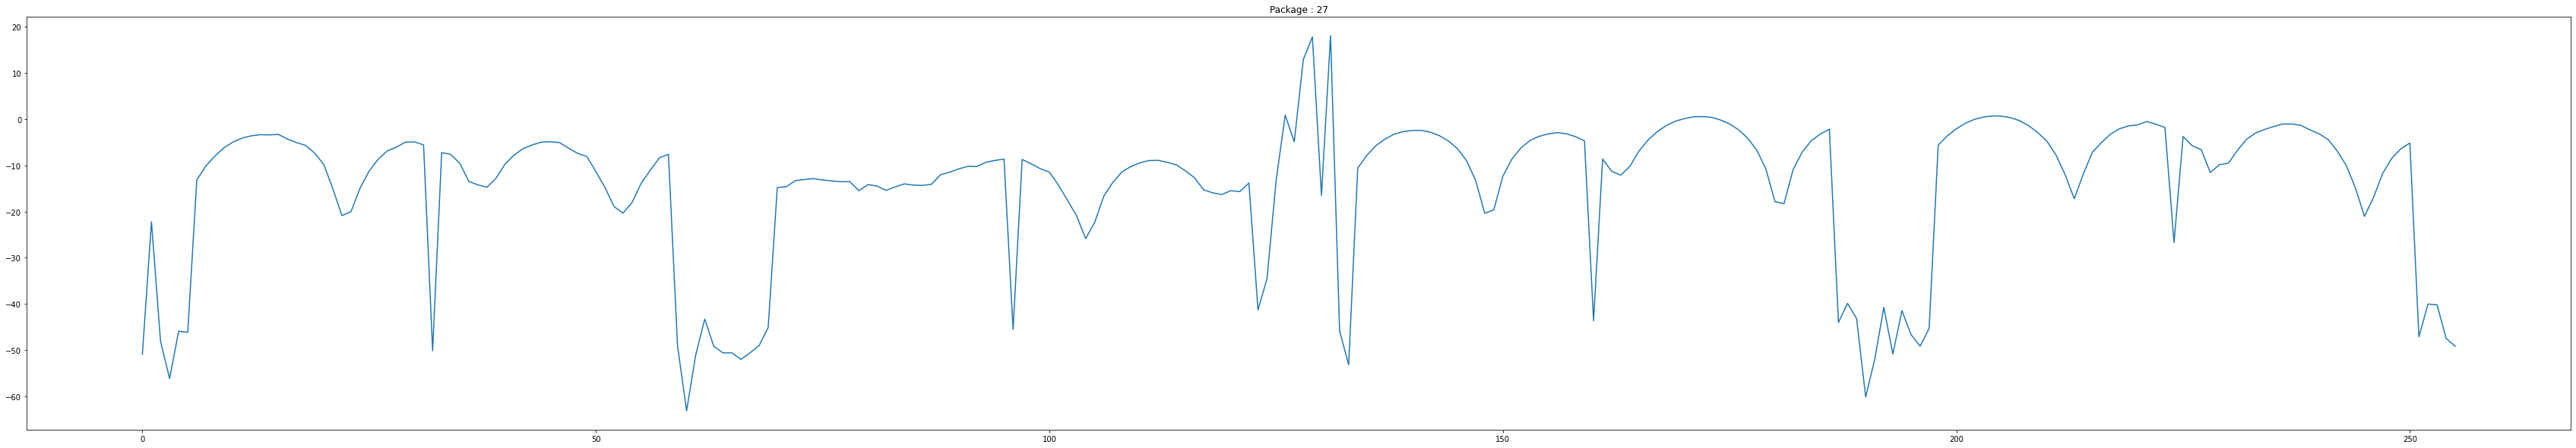

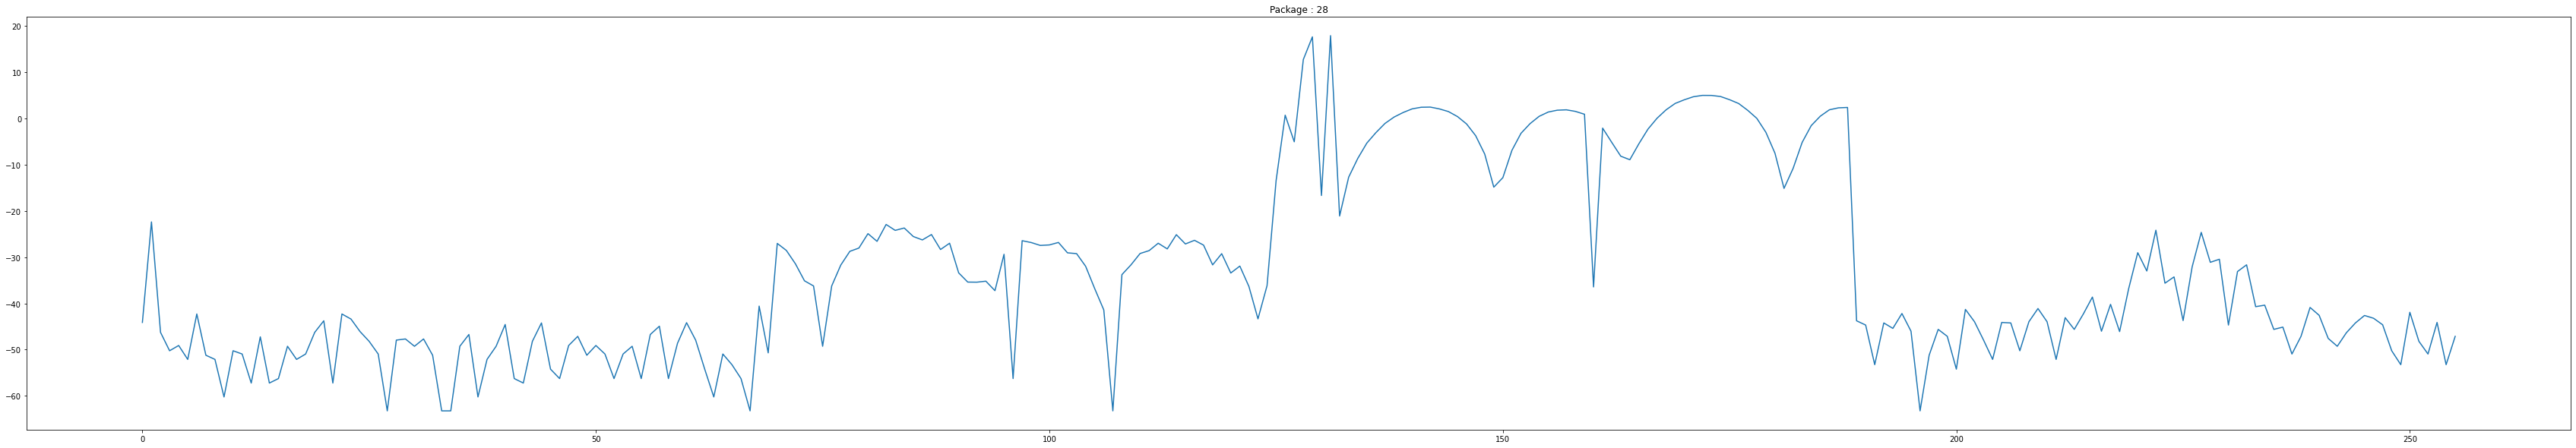

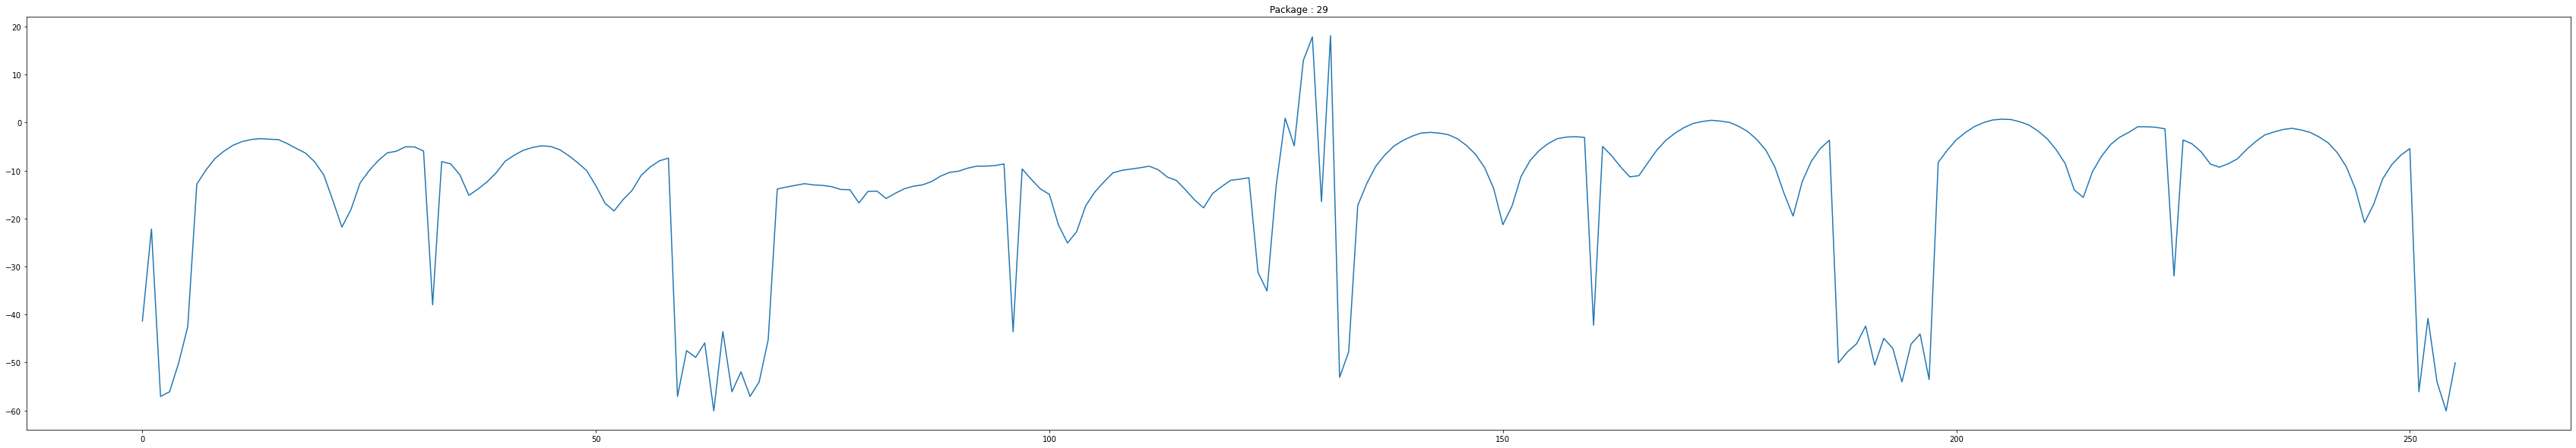

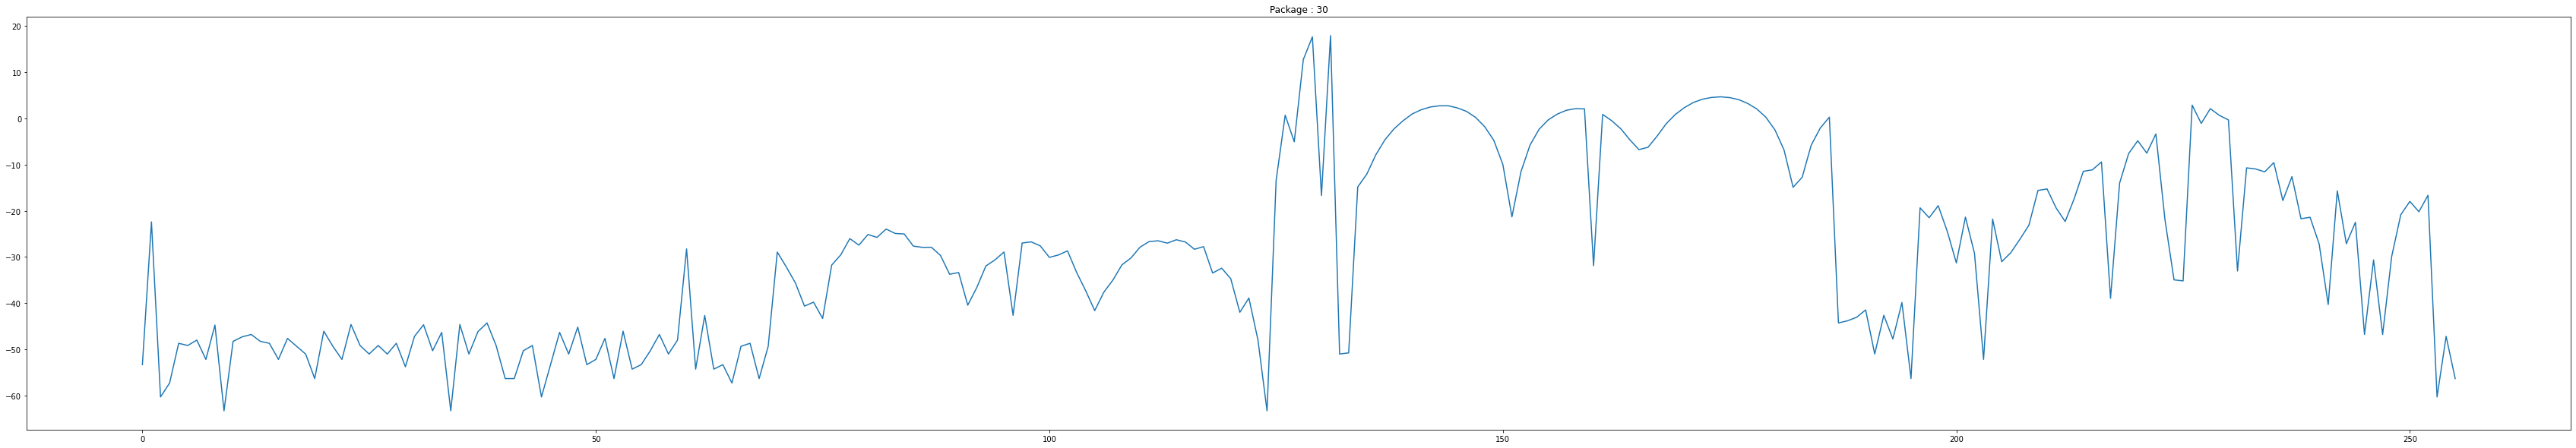

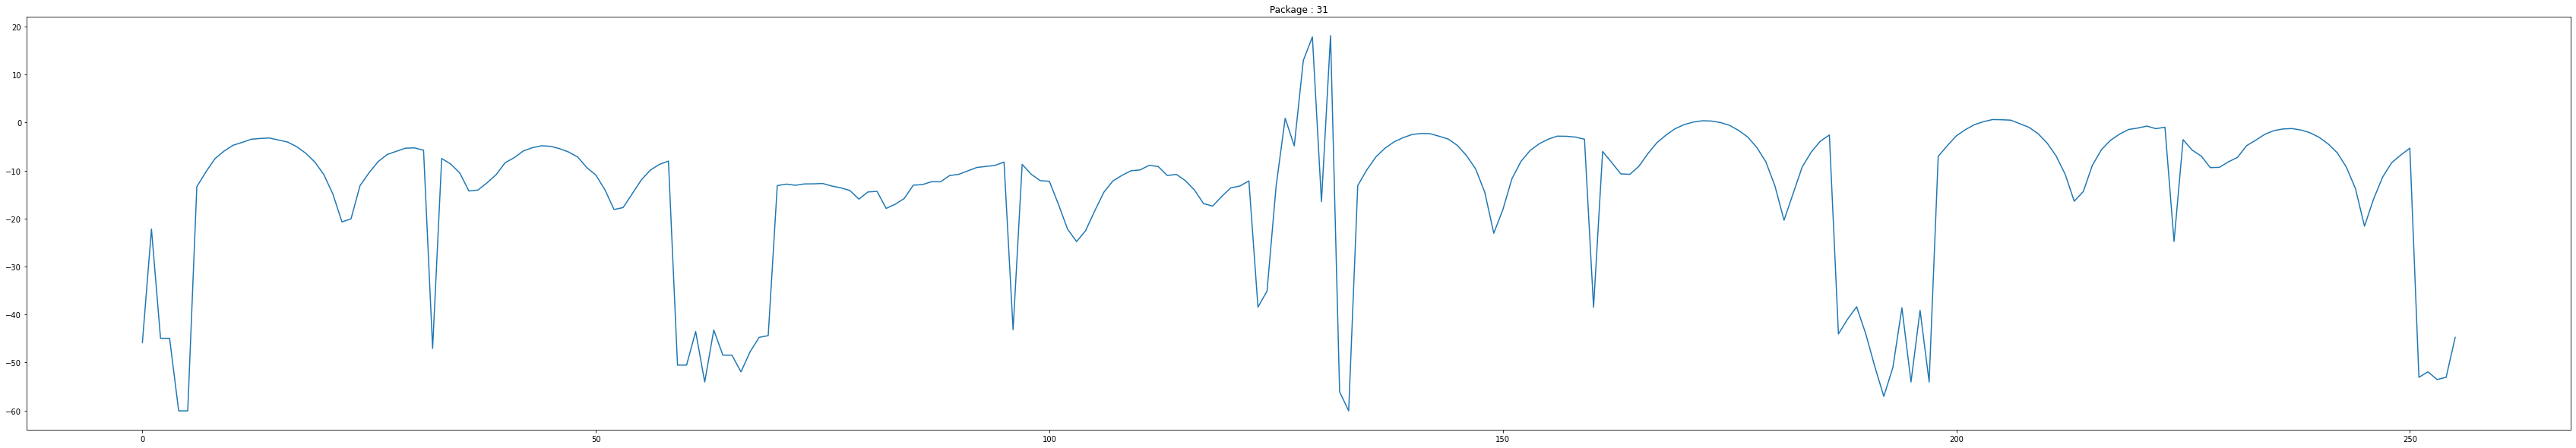

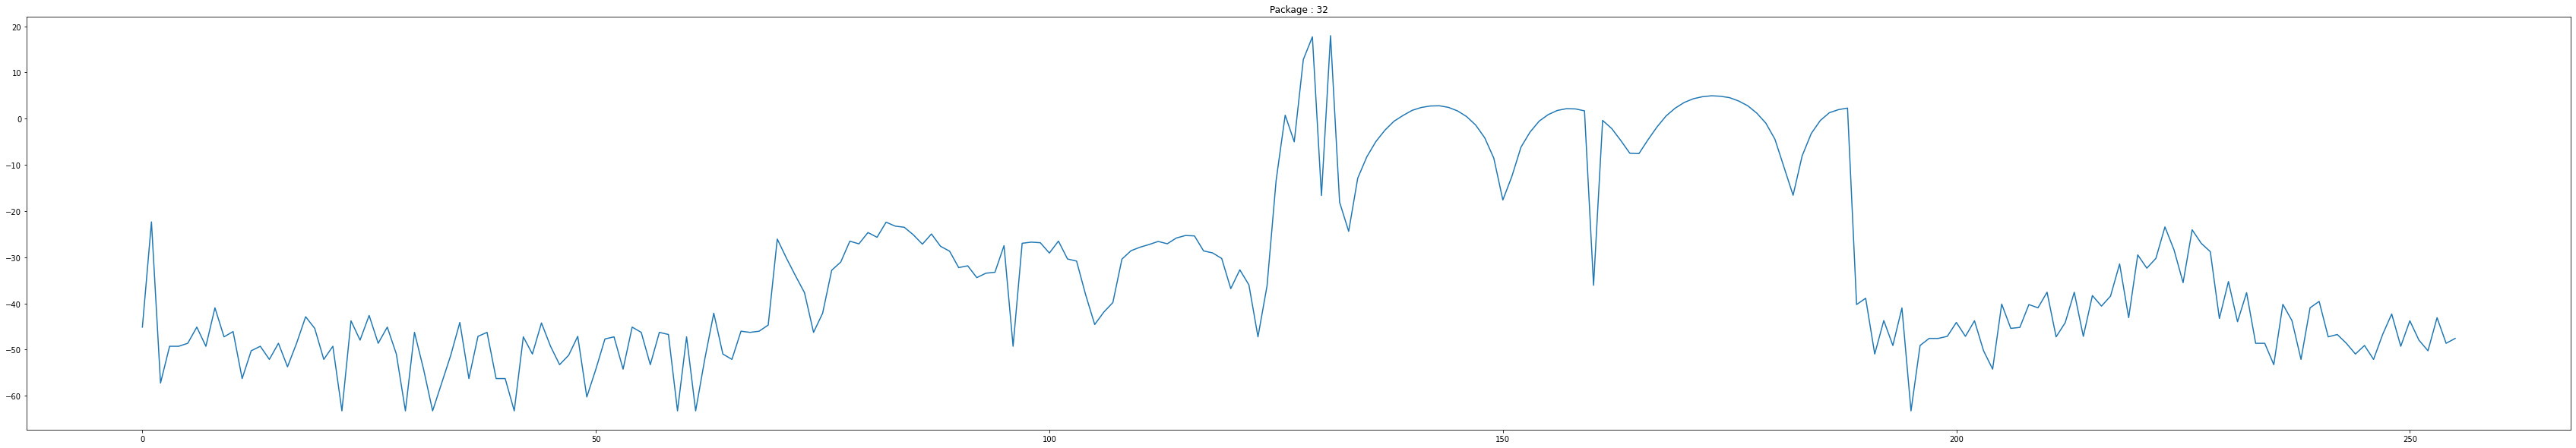

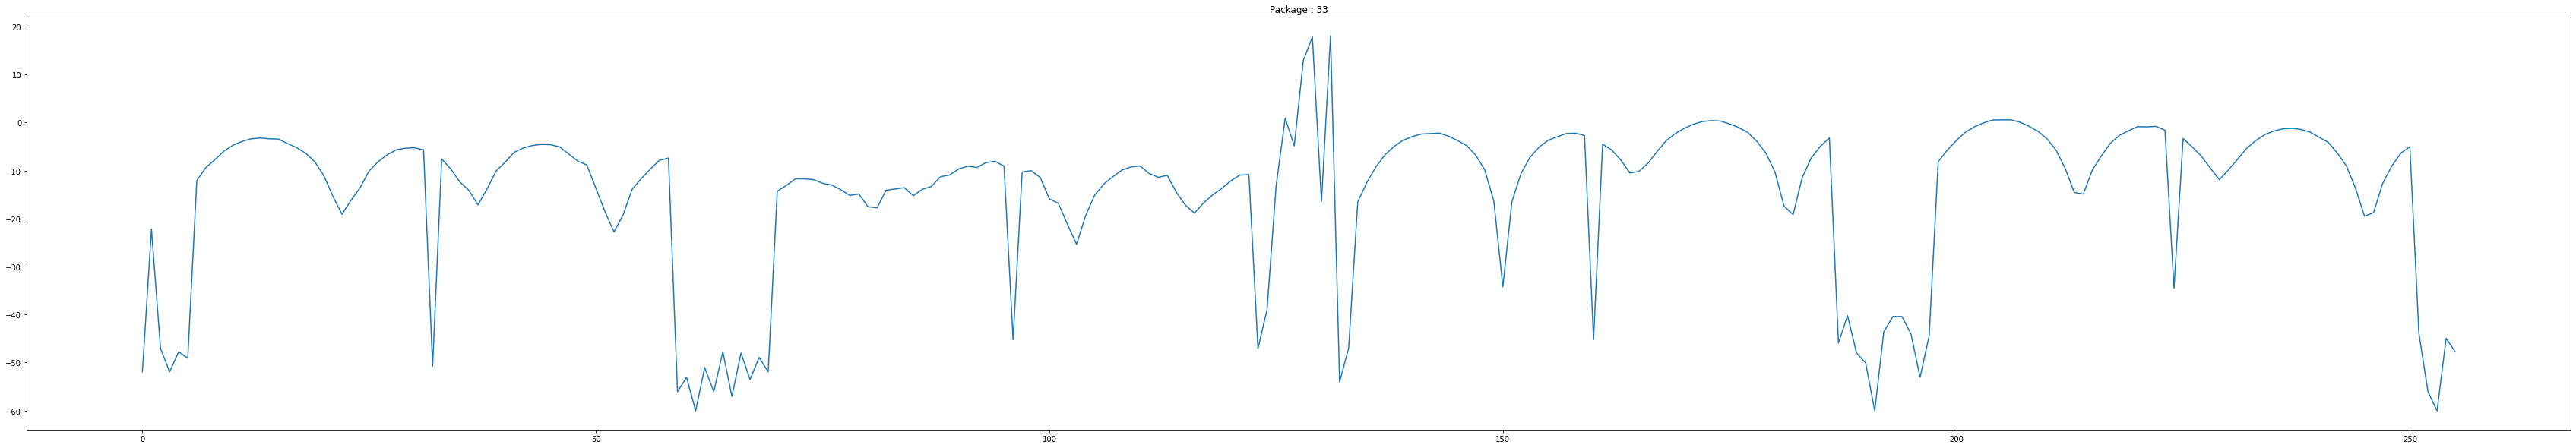

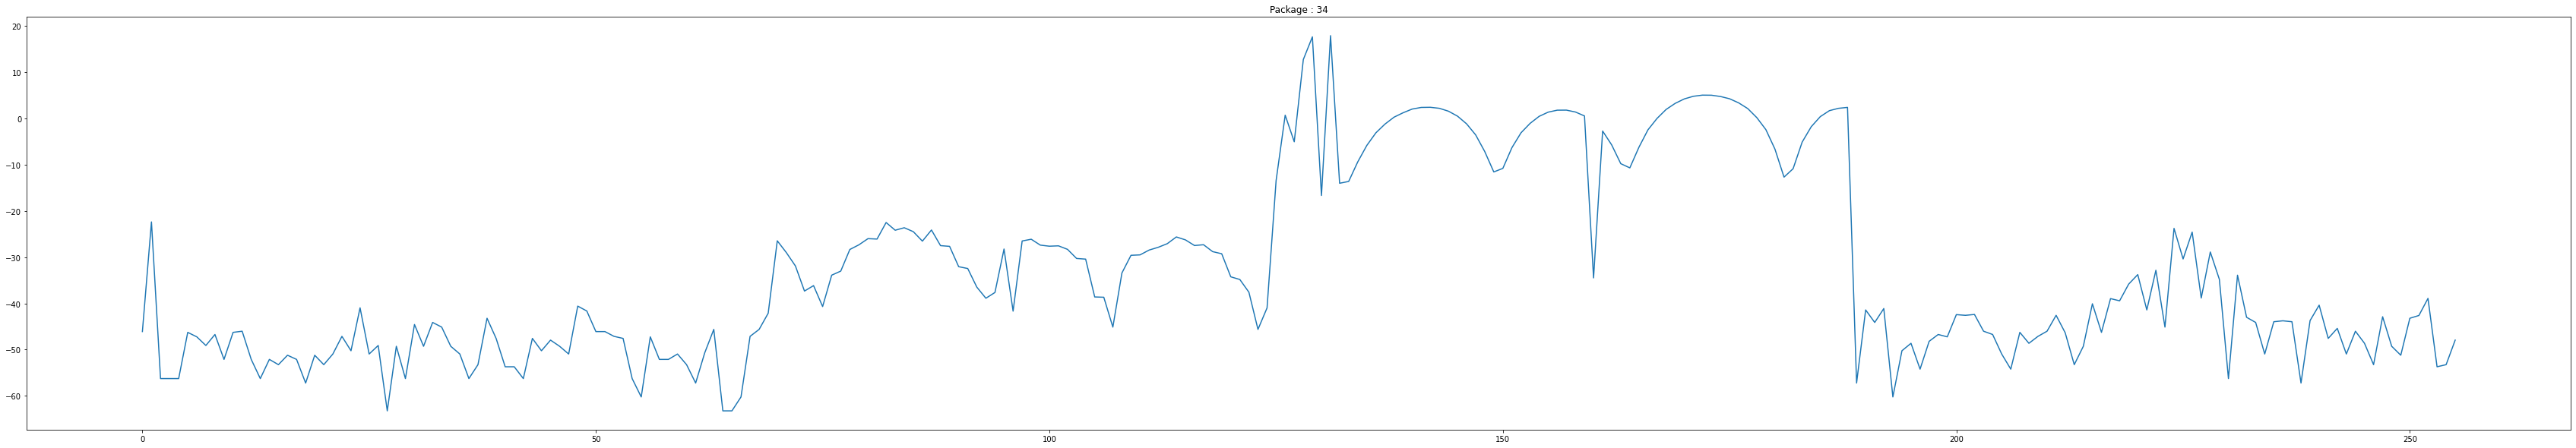

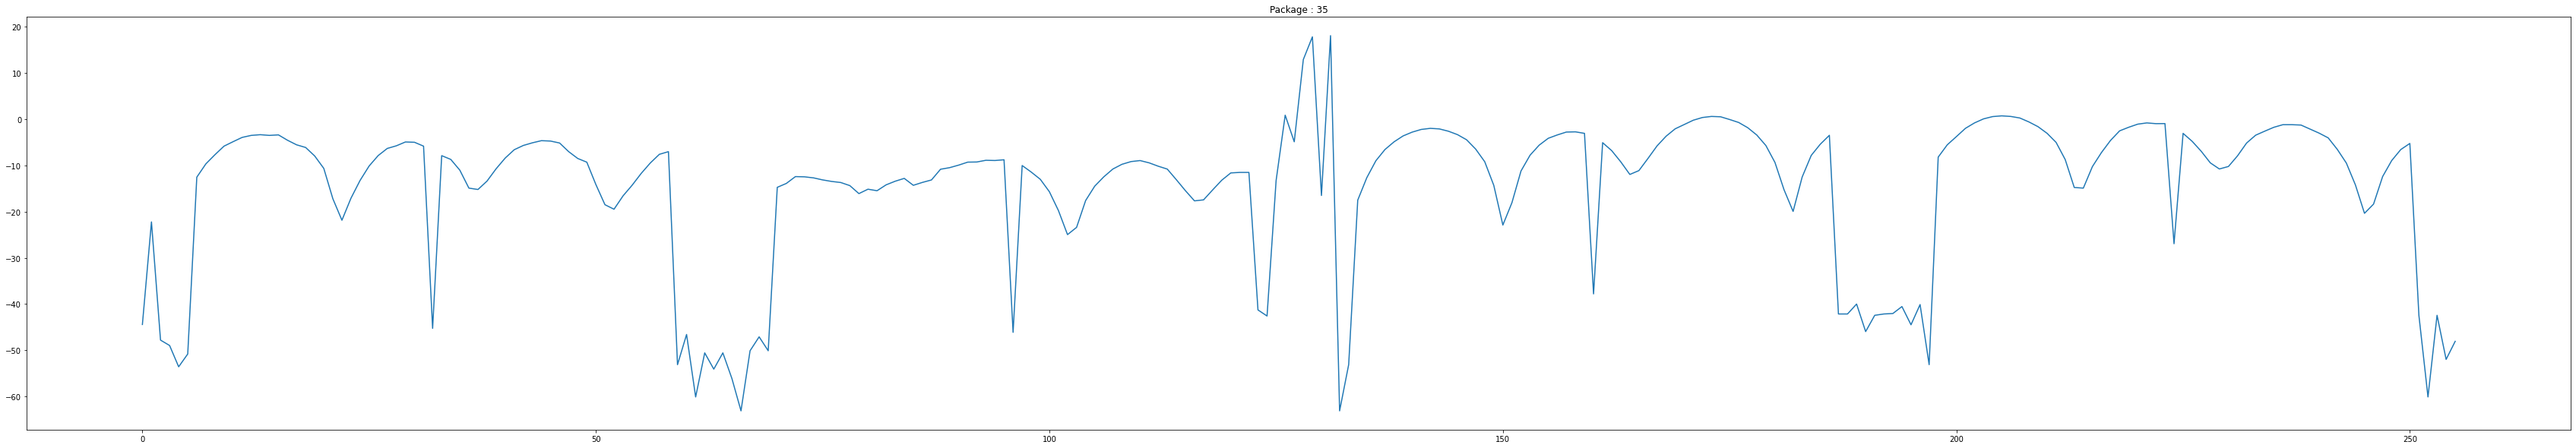

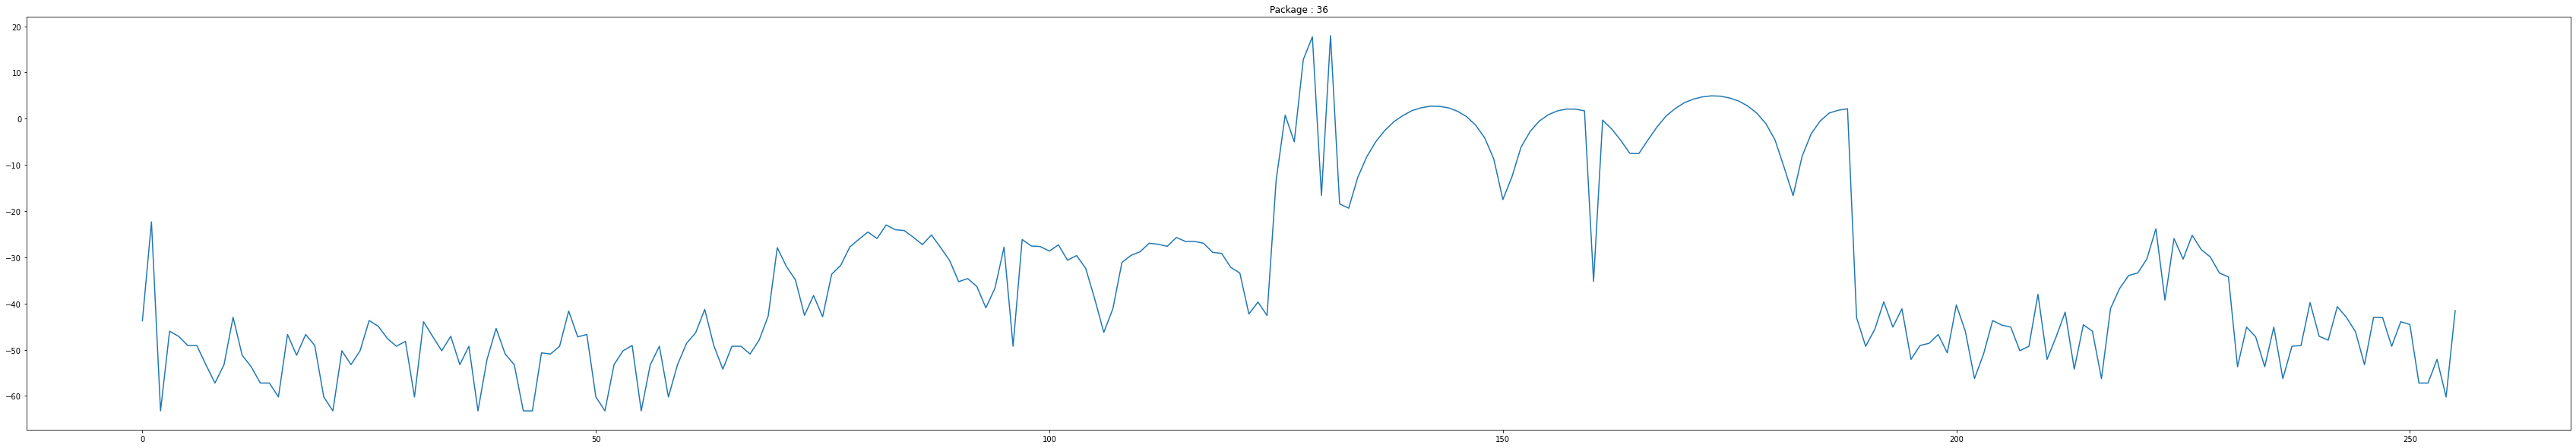

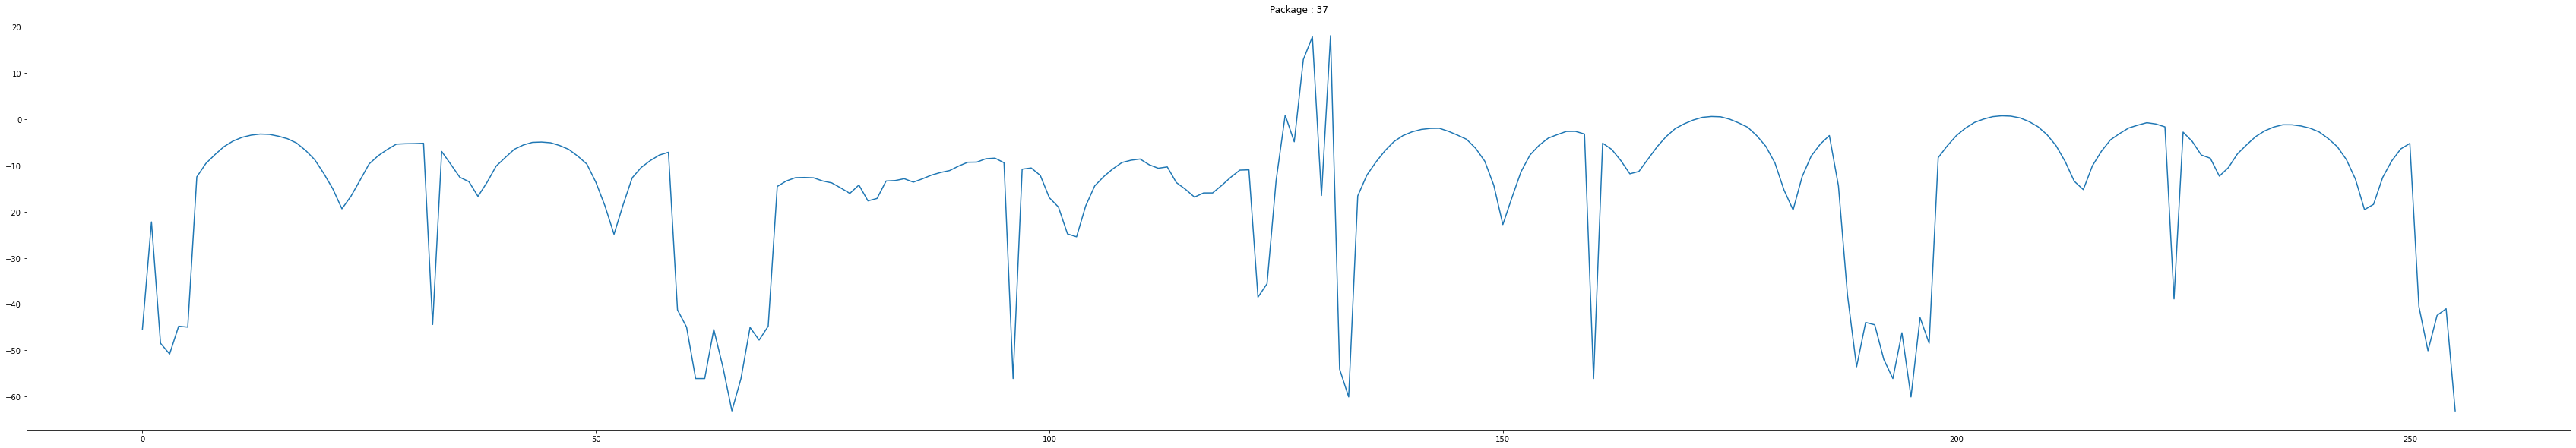

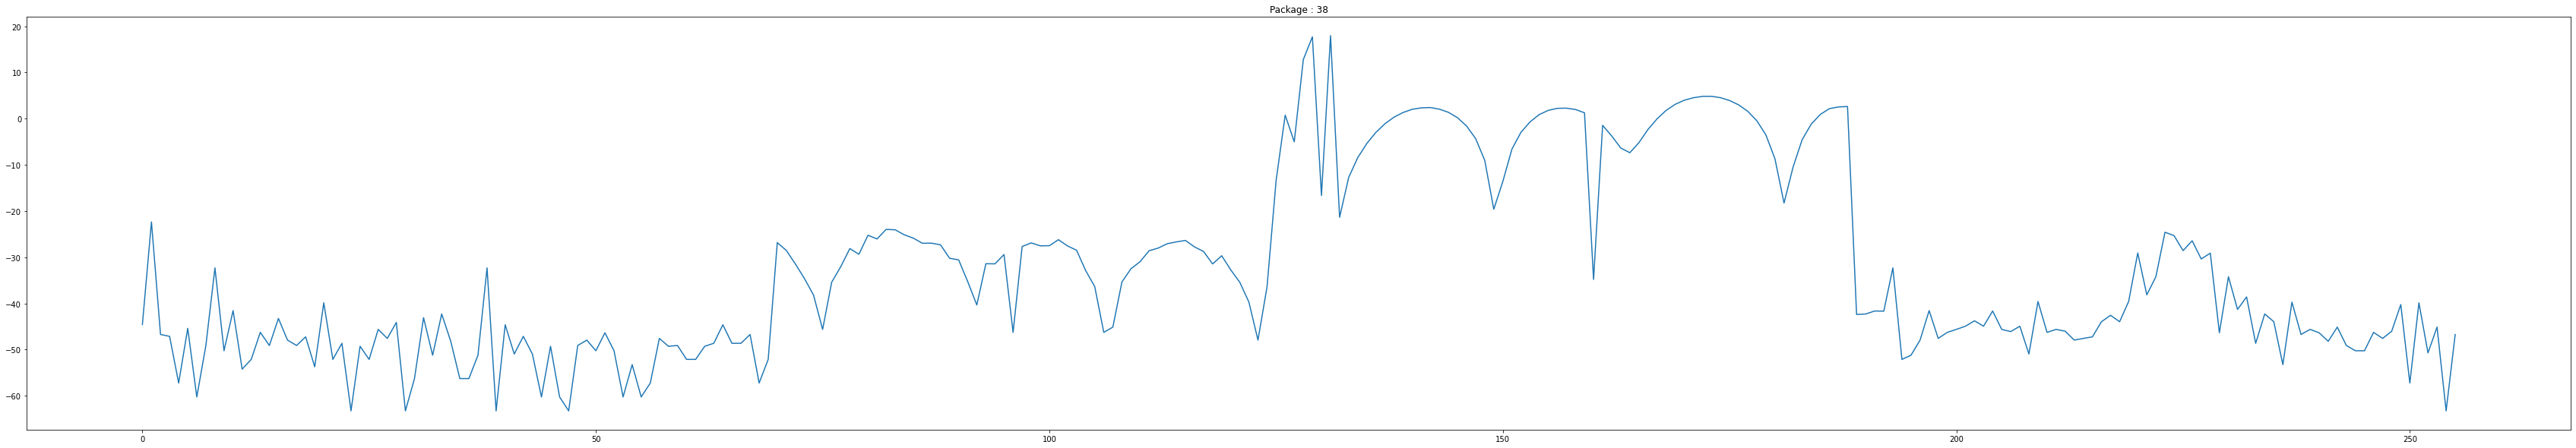

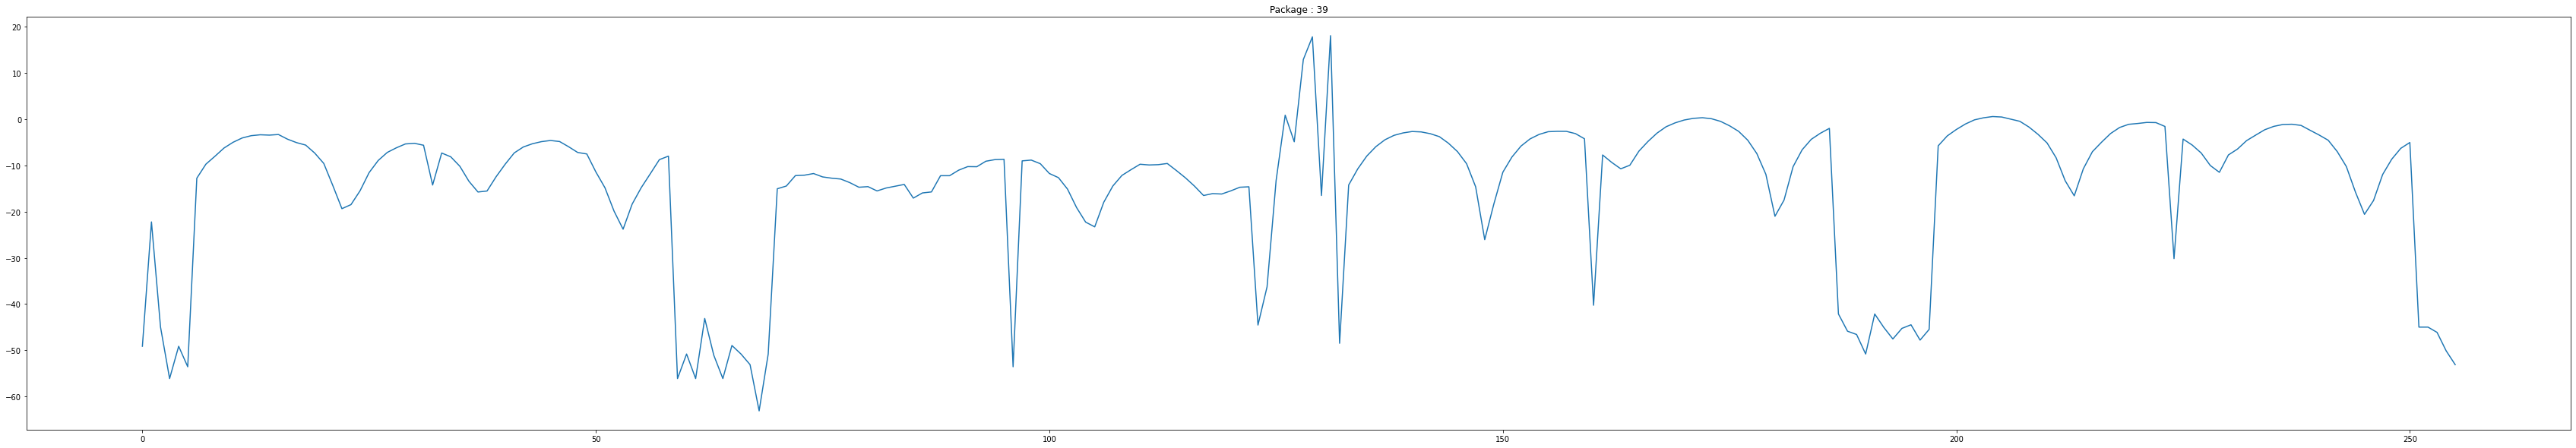

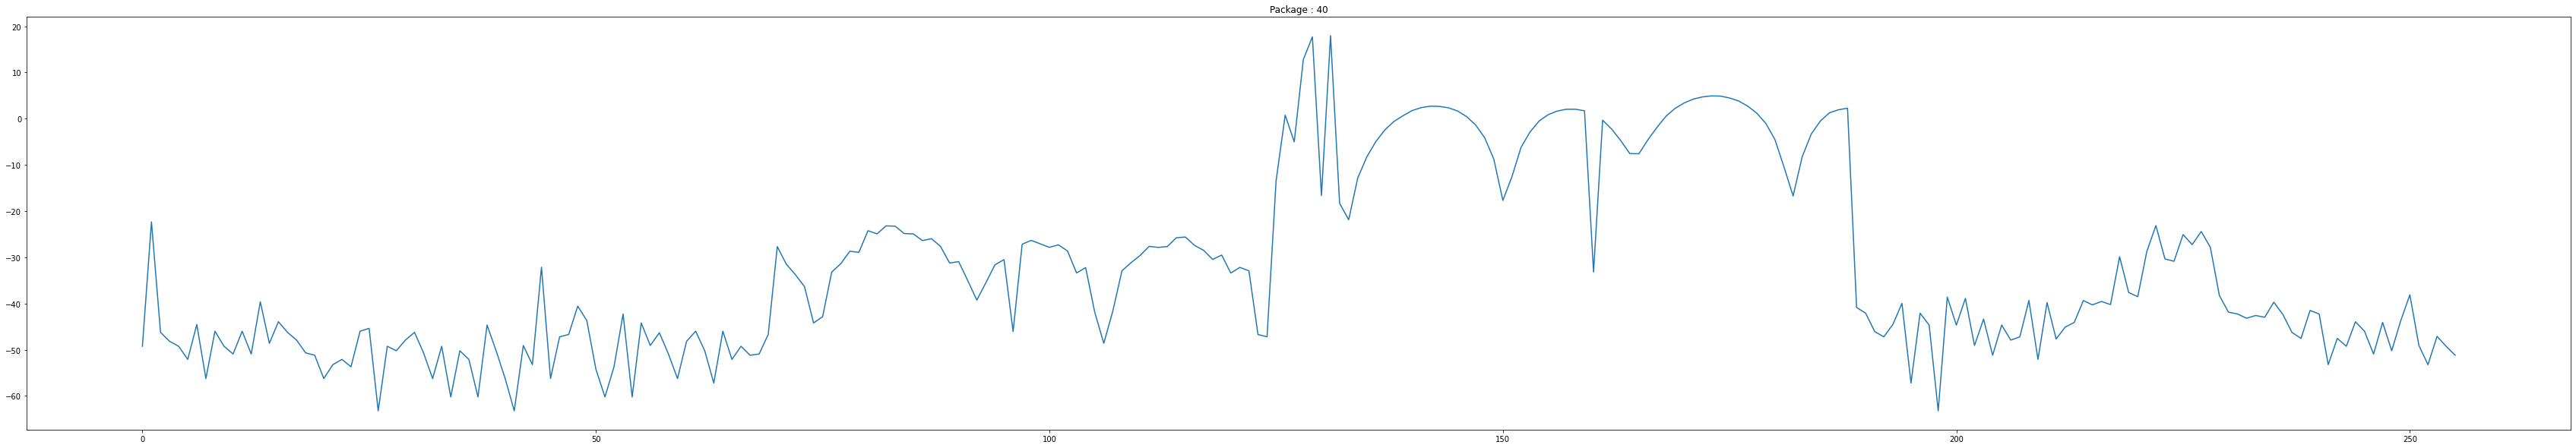

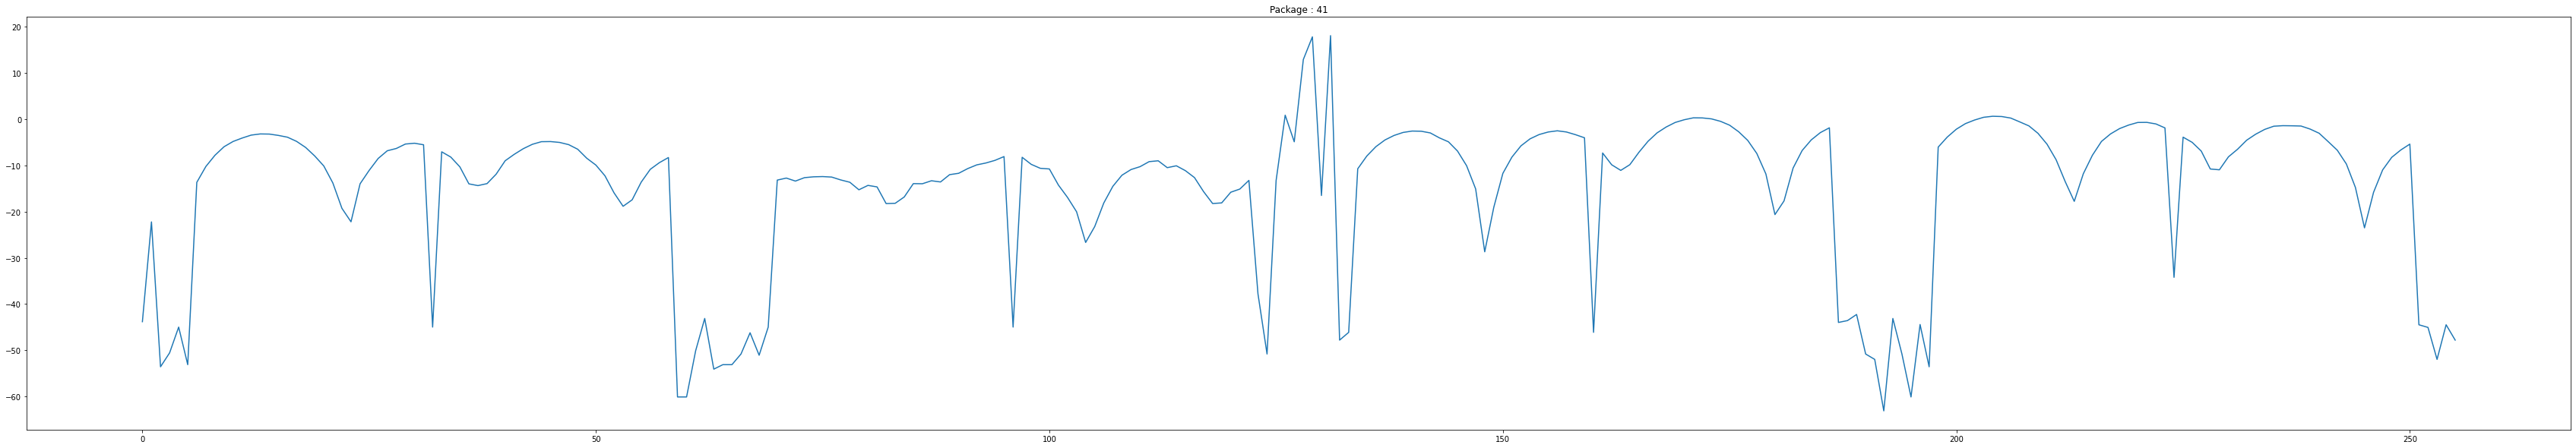

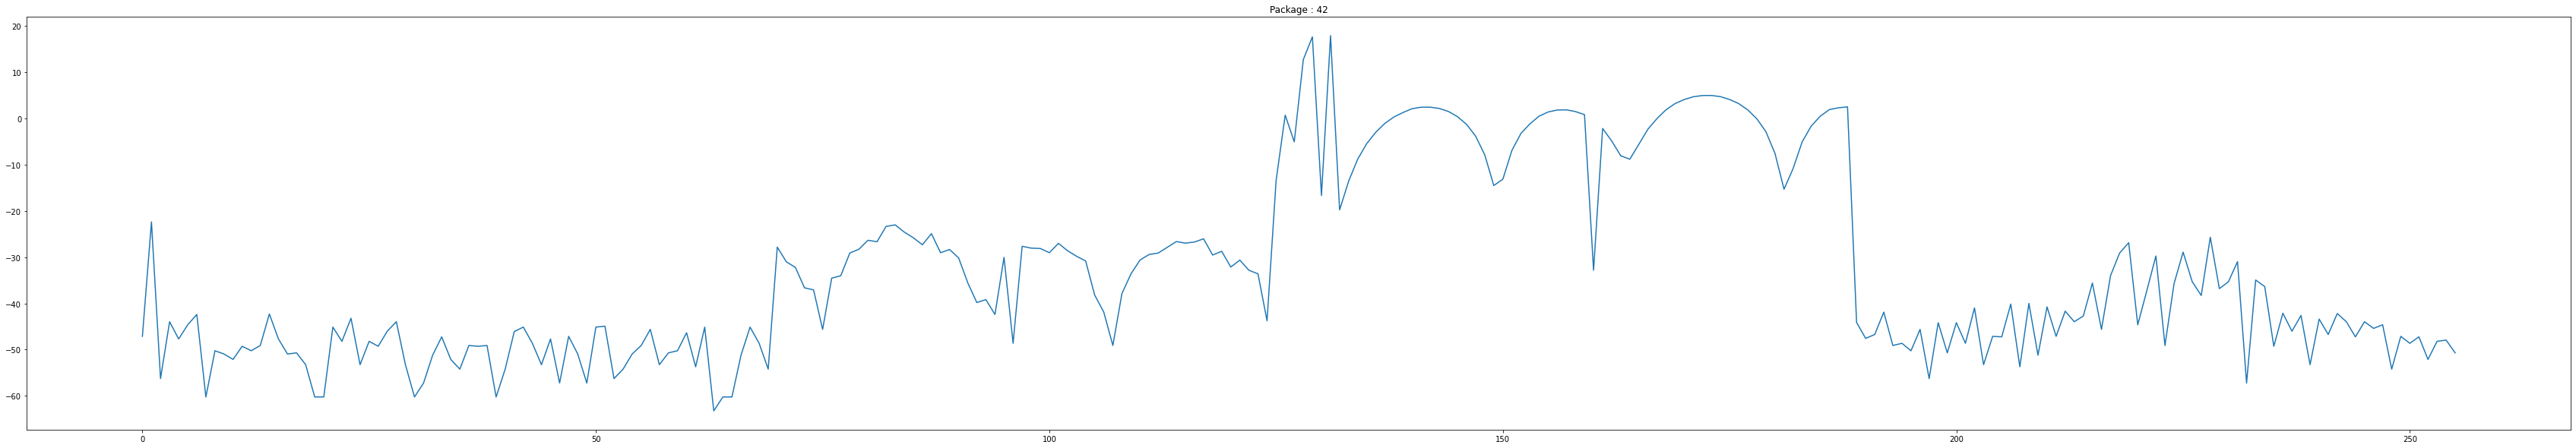

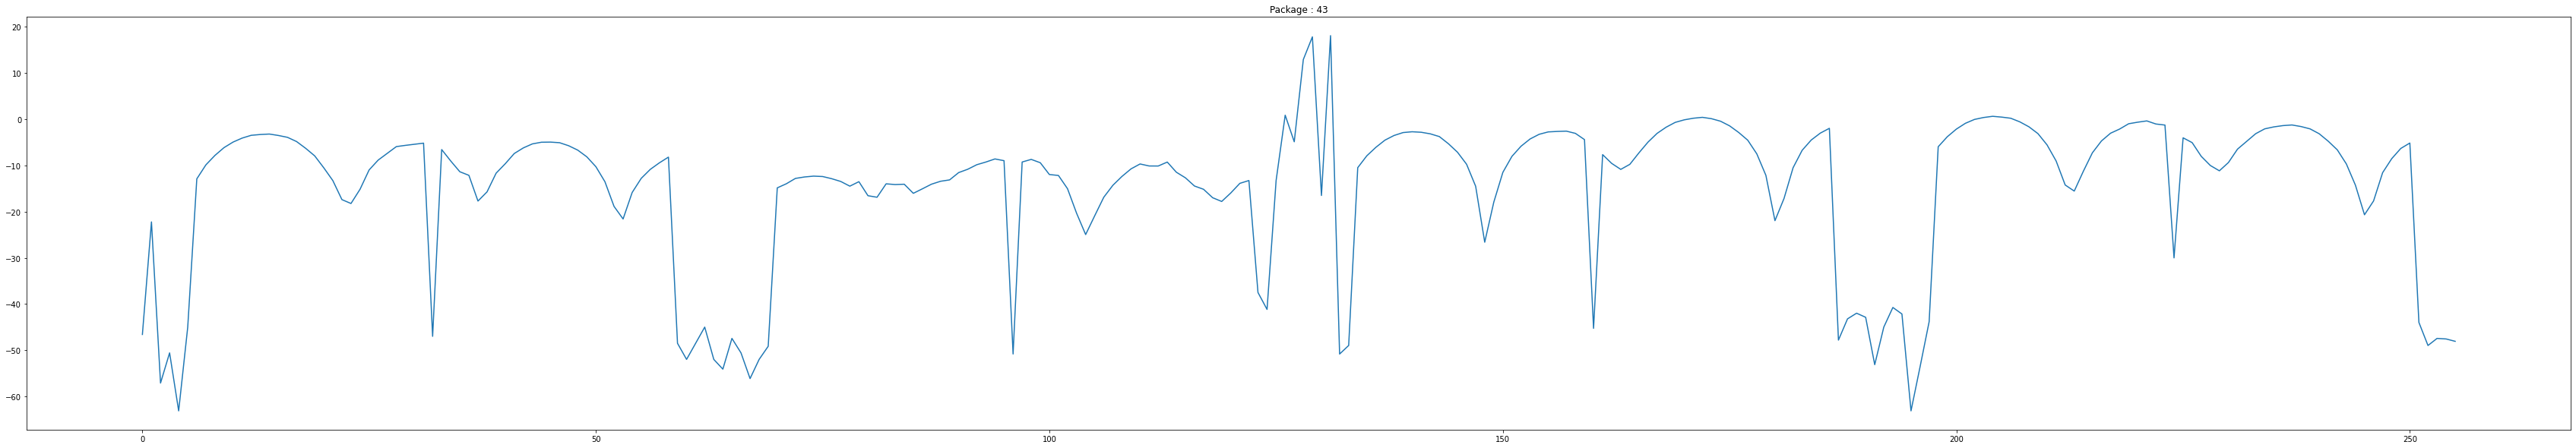

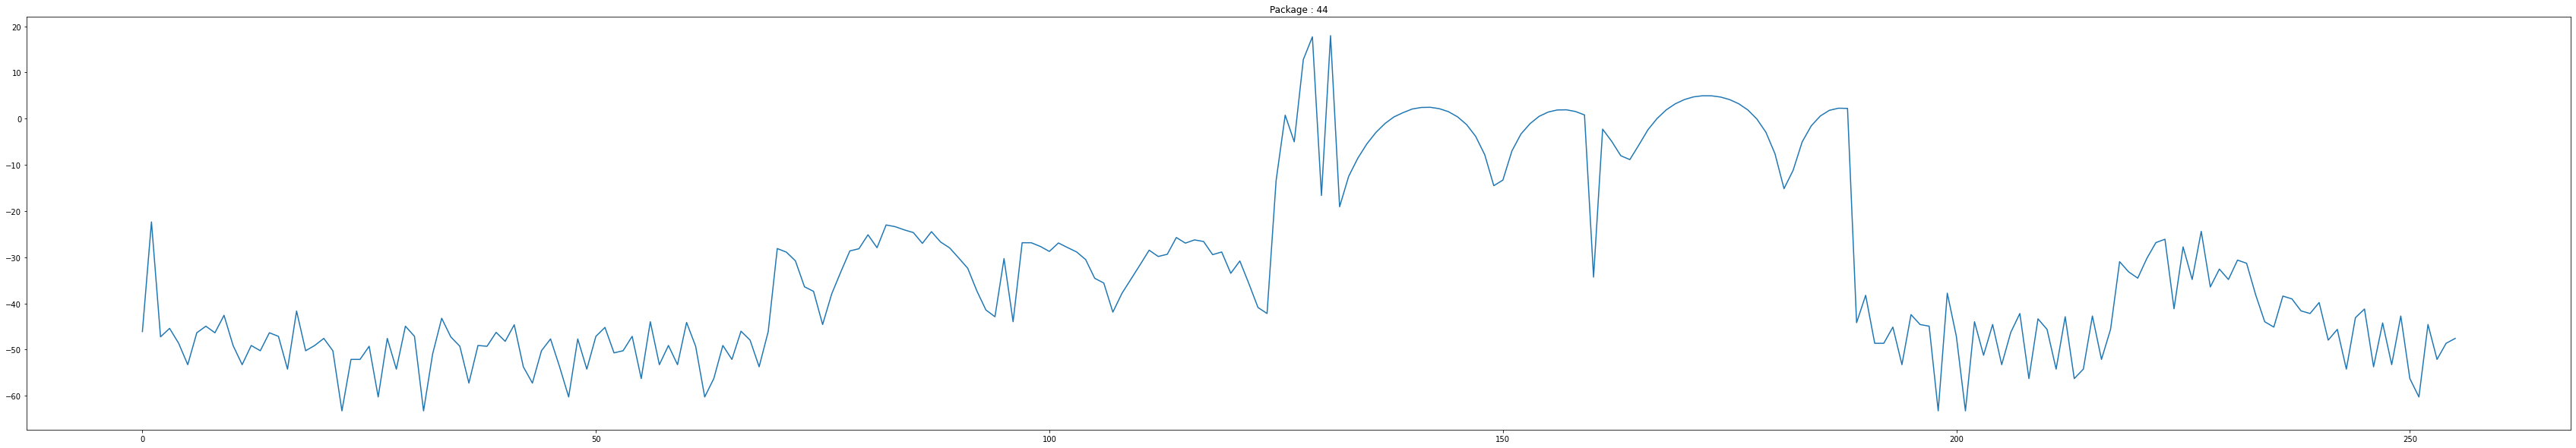

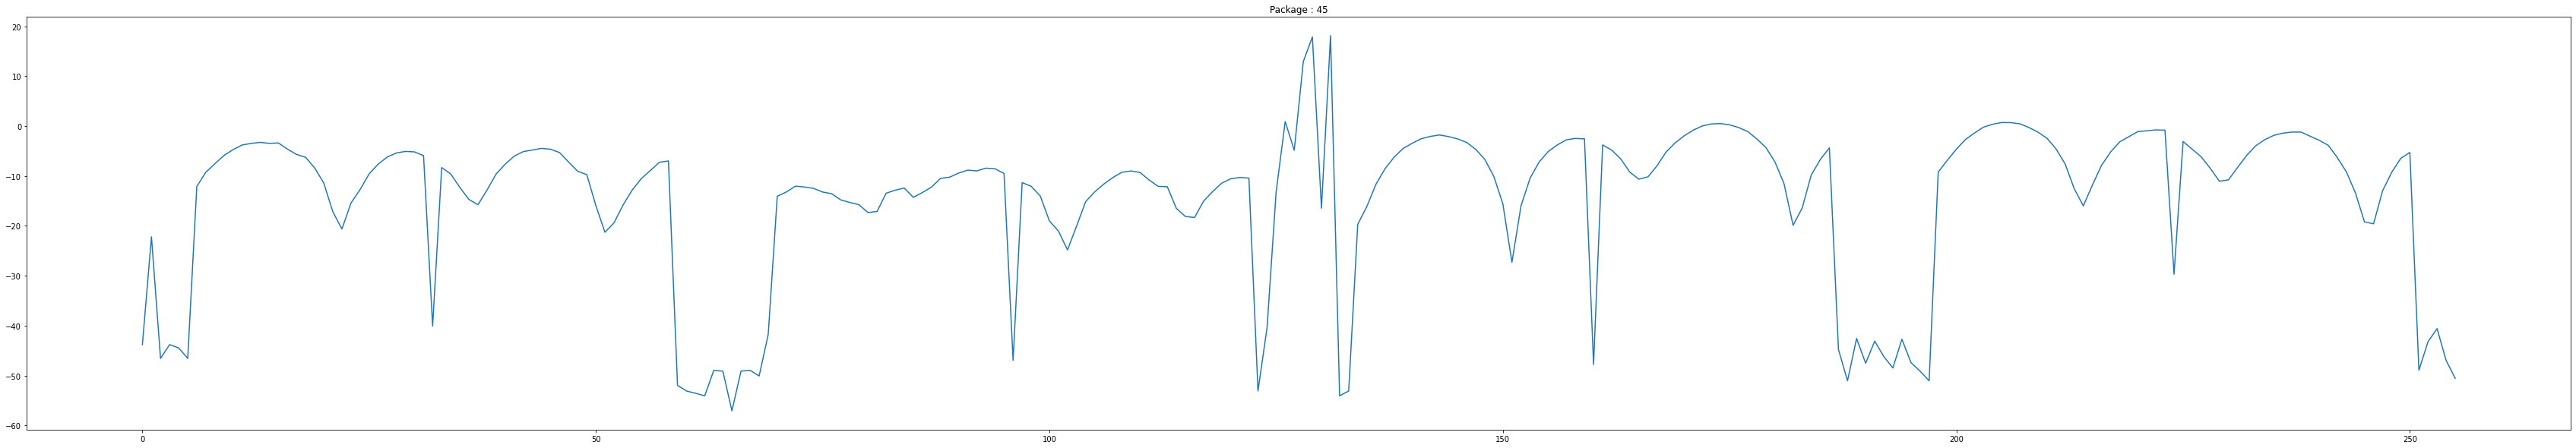

In [4]:
#Internet dataset
df = pd.read_csv(r"csv_files/csv_data_amplitude/brushteeth1.csv")
#Command dataset
#df = pd.read_csv(r"csv_files/csv_amplitude/Smoking_10.csv")
rows,_ = df.shape
for i in range(rows):
    pd.DataFrame(df.iloc[i]).plot.line(ﬁgsize= [60,10], legend=False,title = f"Package : {i}")
    
plt.show()

# Correlation Matrix

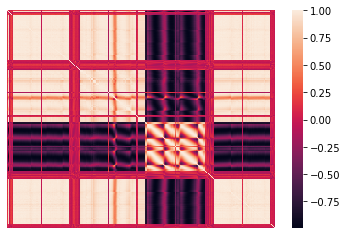

In [5]:
#Command dataset
#df = pd.read_csv(r"csv_files/csv_amplitude/Falldown_1.csv")
#Internet dataset
df = pd.read_csv(r"csv_files/csv_data_amplitude/brushteeth11.csv")
sns.heatmap(df.corr(),xticklabels=False, yticklabels=False)
plt.show()

# File Distribution

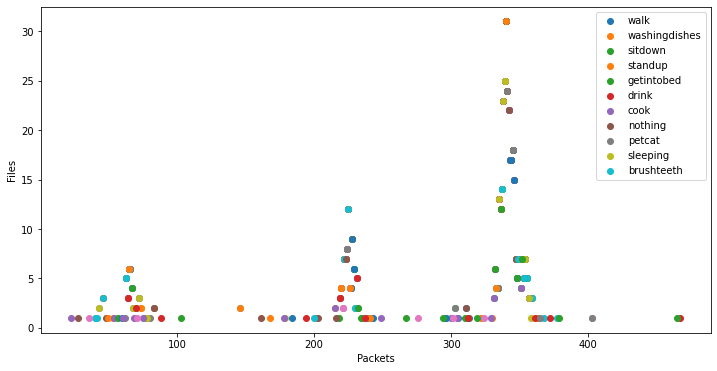

In [6]:
plt.figure(figsize=(12, 6))
data_len = []

for act in activities:
    #lst = glob.glob(fr'csv_files/csv_amplitude/{act}*')
    lst = glob.glob(fr'csv_files/csv_data_amplitude/{act}*')
    temp = []
    
    for f in lst:
        fpath = os.getcwd() + f'\{f}'
        temp.append(len(pd.read_csv(fpath)))

    data_len.append(temp)


data_len_flat = [j for i in data_len for j in i]

for i, act in enumerate(data_len):
    for l in act:
        c = data_len_flat.count(l)
        plt.scatter(l, c)
    plt.scatter(l, c, label=activities[i])


plt.legend()
plt.xlabel('Packets')
plt.ylabel('Files')
plt.show()

# Plot Subcarrier

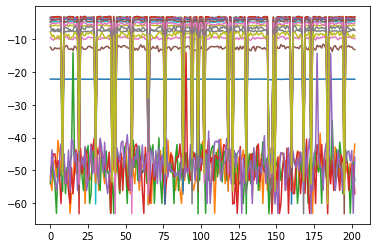

In [7]:
#Command dataset
#df = pd.read_csv(r"csv_files/csv_amplitude/Smoking_10.csv")
#Internet dataset
df = pd.read_csv(r"csv_files/csv_data_amplitude/brushteeth15.csv")
rows,colums = df.shape
for i in range(1,20):
    df[f'{i}'].plot.line(legend=False)
plt.show()